<a href="https://colab.research.google.com/github/Toufique7Husein/A-machine-learning-approach-to-predicting-anxiety-and-depression-levels-amongst-Bangladeshi-students/blob/main/CSE498RFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing / Installing packages

In [ ]:
import math #mathematical computation
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import joblib #saving the model
import seaborn as sns #visualization
import json #exporting columns
import pickle #saving the model
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.linear_model import Lasso #Lasso Regression
from sklearn.tree import DecisionTreeRegressor #Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest Regression
from xgboost import XGBRegressor # XGBoost Regression
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score #Score cross validation
from sklearn.model_selection import cross_validate #Score cross validation
from sklearn.model_selection import GridSearchCV #Hyper parameter tuning
from statistics import stdev
from warnings import simplefilter #Filtering warnings

In [ ]:
dataset = '/content/Final DATASET(Last_Modify) - Sheet1.csv'

In [ ]:
df1 = pd.read_csv(dataset)

In [ ]:
df1.head()

,Your Age,Your Gender,Name of your Educational Institution,Institution Type,District where you stayed when education institutions were closed for Covid19,Location of your household where you stayed when education institutions were closed for Covid19,What is your Family Income Status?,Number of bedrooms in your house?,Do you have a separate bedroom?,Were you ever infected by Covid19?,...,"Feeling afraid, as if something awful might happen",Little Interest or Pleasure in doing things,"Feeling down, depressed, or hopeless","Trouble Falling or staying asleep, or sleeping too much",Feeling tired or having little energy,Poor appetite or overeating,Feeling bad about yourself or that you are a failure or you have let your family down,"Trouble concentrating on things, such as reading, watching tv or videos, studying",Moving or speaking so slowly that other people could have noticed it. Or the opposite being so restless that you have been moving around a lot more than usual,"Thoughts that you would be better off dead, or of hurting yourself"
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Several Days,Not at all,Several Days,Several Days,Nearly every day,More than half the days,Not at all,Several Days,Not at all,Not at all
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Several Days,Not at all,Several Days,Not at all,Not at all,Not at all,Several Days,Not at all,Not at all,Not at all
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Nearly every day,Not at all,More than half the days
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day


In [ ]:
df1.columns

Index(['Your Age', 'Your Gender', 'Name of your Educational Institution',
       'Institution Type',
       'District where you stayed when education institutions were closed for Covid19',
       'Location of your household where you stayed when education institutions were closed for Covid19',
       'What is your Family Income Status?',
       'Number of bedrooms in your house?', 'Do you have a separate bedroom?',
       'Were you ever infected by Covid19?',
       'Has anyone in your family ever been infected by Covid19?  ',
       'If you or your family had been ever infected by Covid19, how much did it affect your mental health during that time? ',
       'Had any of your family members (including yourself) lost their job or business due to Covid19?',
       'With all the deaths due to Covid19 around us in general, how much did it affect your mental health?',
       'Are you a smoker?', 'Do you have any underlying medical condition? ',
       'Do any of your family members have any

In [ ]:
df1.nunique()

Your Age                                                                                                                                                          14
Your Gender                                                                                                                                                        2
Name of your Educational Institution                                                                                                                              30
Institution Type                                                                                                                                                   3
District where you stayed when education institutions were closed for Covid19                                                                                     26
Location of your household where you stayed when education institutions were closed for Covid19                                                                    4
What is yo

## Exploratory Data Analysis And Data Preprocessing 

In [ ]:
df1.columns = df1.columns.str.replace(' ','_')
df1.columns = df1.columns.str.replace(',','_')
df1.columns = df1.columns.str.replace('.','_')
df1.columns = df1.columns.str.replace('-','_')
df1.columns = df1.columns.str.replace(' -','_')
df1.columns = df1.columns.str.replace(' - ','_')
df1.columns = df1.columns.str.replace('- ','_')
df1.columns = df1.columns.str.replace('\n','_')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df1.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Feeling_afraid__as_if_something_awful_might_happen,Little_Interest_or_Pleasure_in_doing_things,Feeling_down__depressed__or_hopeless,Trouble_Falling_or_staying_asleep__or_sleeping_too_much,Feeling_tired_or_having_little_energy_,Poor_appetite_or_overeating,Feeling_bad_about_yourself_or_that_you_are_a_failure_or_you_have_let_your_family_down,Trouble_concentrating_on_things__such_as_reading__watching_tv_or_videos__studying,Moving_or_speaking_so_slowly_that_other_people_could_have_noticed_it__Or_the_opposite_being_so_restless_that_you_have_been_moving_around_a_lot_more_than_usual,Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Several Days,Not at all,Several Days,Several Days,Nearly every day,More than half the days,Not at all,Several Days,Not at all,Not at all
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Several Days,Not at all,Several Days,Not at all,Not at all,Not at all,Several Days,Not at all,Not at all,Not at all
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Nearly every day,Not at all,More than half the days
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day


In [ ]:
df2 = df1
df2.isnull().any()

Your_Age                                                                                                                                                          False
Your_Gender                                                                                                                                                       False
Name_of_your_Educational_Institution                                                                                                                              False
Institution_Type                                                                                                                                                  False
District_where_you_stayed_when_education_institutions_were_closed_for_Covid19                                                                                     False
Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19                                                                 

In [ ]:
df2.isnull().sum()

Your_Age                                                                                                                                                          0
Your_Gender                                                                                                                                                       0
Name_of_your_Educational_Institution                                                                                                                              0
Institution_Type                                                                                                                                                  0
District_where_you_stayed_when_education_institutions_were_closed_for_Covid19                                                                                     0
Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19                                                                   0
What_is_your_Fam

In [ ]:
df2 = df2.dropna(how='any',axis=0) 
df2.isnull().sum()

Your_Age                                                                                                                                                          0
Your_Gender                                                                                                                                                       0
Name_of_your_Educational_Institution                                                                                                                              0
Institution_Type                                                                                                                                                  0
District_where_you_stayed_when_education_institutions_were_closed_for_Covid19                                                                                     0
Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19                                                                   0
What_is_your_Fam

In [ ]:
df2.shape
df2.head(20)

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Feeling_afraid__as_if_something_awful_might_happen,Little_Interest_or_Pleasure_in_doing_things,Feeling_down__depressed__or_hopeless,Trouble_Falling_or_staying_asleep__or_sleeping_too_much,Feeling_tired_or_having_little_energy_,Poor_appetite_or_overeating,Feeling_bad_about_yourself_or_that_you_are_a_failure_or_you_have_let_your_family_down,Trouble_concentrating_on_things__such_as_reading__watching_tv_or_videos__studying,Moving_or_speaking_so_slowly_that_other_people_could_have_noticed_it__Or_the_opposite_being_so_restless_that_you_have_been_moving_around_a_lot_more_than_usual,Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Several Days,Not at all,Several Days,Several Days,Nearly every day,More than half the days,Not at all,Several Days,Not at all,Not at all
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Several Days,Not at all,Several Days,Not at all,Not at all,Not at all,Several Days,Not at all,Not at all,Not at all
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Nearly every day,Not at all,More than half the days
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day
5,17,Male,"Sonapur College, Maijdee,Noakhali",College,Noakhali,Semi-Urban,Middle class,2 bedrooms,Maybe,No,...,Several Days,Nearly every day,Not at all,Nearly every day,Several Days,Several Days,Several Days,Nearly every day,Not at all,Nearly every day
6,17,Female,Noakhali Government college,College,Noakhali,Upazila,Middle class,3 bedrooms,No,Maybe,...,Not at all,More than half the days,Several Days,Nearly every day,Nearly every day,More than half the days,More than half the days,Nearly every day,Not at all,Not at all
7,17,Male,Noakhali Govt. College,College,Noakhali,Rural,Middle class,2 bedrooms,Yes,No,...,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all,Not at all
8,17,Male,Scholar's School and College,College,Noakhali,Rural,Lower-Middle,2 bedrooms,No,No,...,More than half the days,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Several Days,Several Days,Nearly every day
9,17,Female,Noakhali Government college,College,Noakhali,Upazila,Upper-Middle class,3 bedrooms,No,No,...,Several Days,Several Days,Several Days,Several Days,Not at all,Not at all,Several Days,Several Days,Not at all,Not at all


### Checking for data consistency

In [ ]:
df2.nunique()

Your_Age                                                                                                                                                          14
Your_Gender                                                                                                                                                        2
Name_of_your_Educational_Institution                                                                                                                              30
Institution_Type                                                                                                                                                   3
District_where_you_stayed_when_education_institutions_were_closed_for_Covid19                                                                                     26
Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19                                                                    4
What_is_yo

In [ ]:
df2.Name_of_your_Educational_Institution.unique()

array(['Viqarunnisa Noon School And College',
       'Motijheel Govt Girls High School ',
       'Birshreshtha Munshi Abdur Rouf Public College',
       "Scholar's School and College", 'Noakhali Government college ',
       'Sonapur College, Maijdee,Noakhali ', 'Noakhali Govt. College ',
       'Chowmuhani Government SA College ',
       'Noakhali Govt. Women College', 'Maijdee Public College ',
       'BAF Shaheen College Dhaka', "Noakhali Govt  Women's  College ",
       'North south university', 'Dhaka University ',
       'Birshrestha Noor Mohammad Rifles Public College ',
       'Dhaka City College', "Noakhali womens' college ",
       'Rajshahi University of Engineering & Technology',
       'Noakhali Science and Technology University ',
       'Bangladesh University of Business and Technology',
       'University of Dhaka ',
       'Military Institute of Science and Technology',
       'Jagannath University', 'Daffodil International University   ',
       'University of Asia Pac

In [ ]:
df2.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Feeling_afraid__as_if_something_awful_might_happen,Little_Interest_or_Pleasure_in_doing_things,Feeling_down__depressed__or_hopeless,Trouble_Falling_or_staying_asleep__or_sleeping_too_much,Feeling_tired_or_having_little_energy_,Poor_appetite_or_overeating,Feeling_bad_about_yourself_or_that_you_are_a_failure_or_you_have_let_your_family_down,Trouble_concentrating_on_things__such_as_reading__watching_tv_or_videos__studying,Moving_or_speaking_so_slowly_that_other_people_could_have_noticed_it__Or_the_opposite_being_so_restless_that_you_have_been_moving_around_a_lot_more_than_usual,Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Several Days,Not at all,Several Days,Several Days,Nearly every day,More than half the days,Not at all,Several Days,Not at all,Not at all
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Several Days,Not at all,Several Days,Not at all,Not at all,Not at all,Several Days,Not at all,Not at all,Not at all
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Nearly every day,Not at all,More than half the days
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day


In [ ]:
df2.Institution_Type.unique()

array(['School ', 'College ', 'University'], dtype=object)

In [ ]:
df2.District_where_you_stayed_when_education_institutions_were_closed_for_Covid19.unique()

array(['Dhaka', 'Noakhali', 'Comilla', 'Dhaka Metropolitan Area',
       'Tangail ', 'Chattogram ', 'Narayanganj ', 'Barishal', 'Dinajpur ',
       'Dinajpur', 'Jhenaidah ', 'Sonargaon, Narayanganj,', 'Gazipur',
       'Jashore ', 'Jamalpur', 'Chuadanga', 'Mymensingh', 'Jashore',
       'Gazipur ', 'Natore', 'Gaibandha', 'Homw Town ', 'Mymensingh ',
       'Feni', 'Sirajganj', 'Rajshahi '], dtype=object)

### Data Preprocessing

In [ ]:
df2.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Feeling_afraid__as_if_something_awful_might_happen,Little_Interest_or_Pleasure_in_doing_things,Feeling_down__depressed__or_hopeless,Trouble_Falling_or_staying_asleep__or_sleeping_too_much,Feeling_tired_or_having_little_energy_,Poor_appetite_or_overeating,Feeling_bad_about_yourself_or_that_you_are_a_failure_or_you_have_let_your_family_down,Trouble_concentrating_on_things__such_as_reading__watching_tv_or_videos__studying,Moving_or_speaking_so_slowly_that_other_people_could_have_noticed_it__Or_the_opposite_being_so_restless_that_you_have_been_moving_around_a_lot_more_than_usual,Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Several Days,Not at all,Several Days,Several Days,Nearly every day,More than half the days,Not at all,Several Days,Not at all,Not at all
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Several Days,Not at all,Several Days,Not at all,Not at all,Not at all,Several Days,Not at all,Not at all,Not at all
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Nearly every day,Not at all,More than half the days
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day


In [ ]:
df2['Your_Age'].value_counts()

23    32
22    30
24    29
19    23
18    15
25    15
21    13
20    10
17     8
26     2
27     2
28     2
15     1
16     1
Name: Your_Age, dtype: int64

In [ ]:
df2['Your_Age'].value_counts()

23    32
22    30
24    29
19    23
18    15
25    15
21    13
20    10
17     8
26     2
27     2
28     2
15     1
16     1
Name: Your_Age, dtype: int64

In [ ]:
df2['Your_Gender'].value_counts()

Male      114
Female     69
Name: Your_Gender, dtype: int64

In [ ]:
df2['Name_of_your_Educational_Institution'].value_counts()

North south university                                  120
Noakhali Govt. College                                   15
Noakhali Government college                              14
Rajshahi University of Engineering & Technology           4
Scholar's School and College                              4
Chowmuhani Government SA College                          2
Daffodil International University                         1
Bangladesh University of Business and Technology          1
University of Dhaka                                       1
Military Institute of Science and Technology              1
Jagannath University                                      1
Viqarunnisa Noon School And College                       1
University of Asia Pacific                                1
Noakhali Science and Technology University                1
University of Dhaka                                       1
Dhaka                                                     1
American International University Bangla

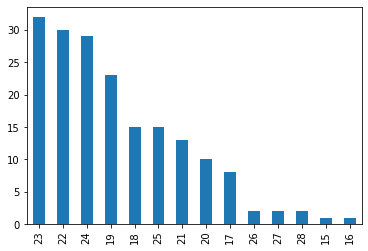

In [ ]:
df2['Your_Age'].value_counts().plot.bar()

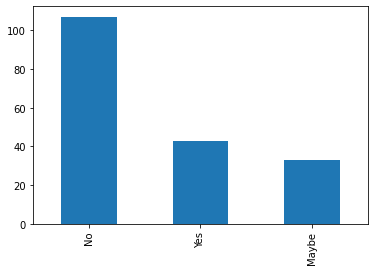

In [ ]:
df2['Were_you_ever_infected_by_Covid19?'].value_counts().plot.bar()

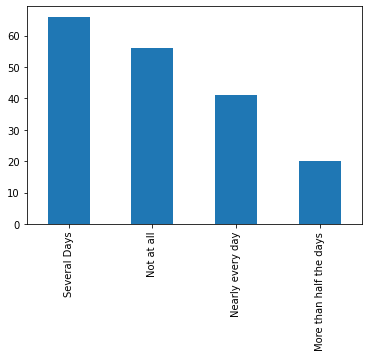

In [ ]:
df2['Feeling_afraid__as_if_something_awful_might_happen'].value_counts().plot.bar()

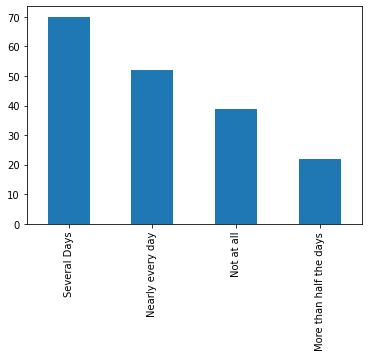

In [ ]:
df2['Feeling_down__depressed__or_hopeless'].value_counts().plot.bar()

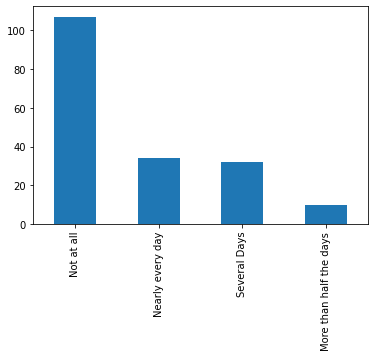

In [ ]:
df2['Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself'].value_counts().plot.bar()

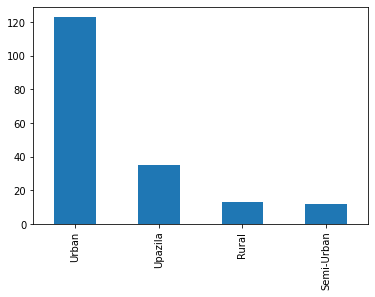

In [ ]:
df2['Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19'].value_counts().plot.bar()

# **Creating Separate List For making Depression Column**

In [ ]:
df2.columns

Index(['Your_Age', 'Your_Gender', 'Name_of_your_Educational_Institution',
       'Institution_Type',
       'District_where_you_stayed_when_education_institutions_were_closed_for_Covid19',
       'Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19',
       'What_is_your_Family_Income_Status?',
       'Number_of_bedrooms_in_your_house?', 'Do_you_have_a_separate_bedroom?',
       'Were_you_ever_infected_by_Covid19?',
       'Has_anyone_in_your_family_ever_been_infected_by_Covid19?__',
       'If_you_or_your_family_had_been_ever_infected_by_Covid19__how_much_did_it_affect_your_mental_health_during_that_time?_',
       'Had_any_of_your_family_members_(including_yourself)_lost_their_job_or_business_due_to_Covid19?',
       'With_all_the_deaths_due_to_Covid19_around_us_in_general__how_much_did_it_affect_your_mental_health?',
       'Are_you_a_smoker?', 'Do_you_have_any_underlying_medical_condition?_',
       'Do_any_of_your_family_members_have_any

In [ ]:
#1.for Little_Interest_or_Pleasure_in_doing_things column
little = []

tempLittle = df2.Little_Interest_or_Pleasure_in_doing_things.values.tolist()

for i in tempLittle:
  if i == 'Not at all':
    little.append(int(0))
  elif i == 'Several Days':
    little.append(int(1))
  elif i == 'More than half the days':
    little.append(int(2))
  else:
    little.append(int(3))


#2.Feeling_down__depressed__or_hopeless
FeelingDep = []
tempFD = df2.Feeling_down__depressed__or_hopeless.values.tolist()

for i in tempFD:
  if i == 'Not at all':
    FeelingDep.append(int(0))
  elif i == 'Several Days':
    FeelingDep.append(int(1))
  elif i == 'More than half the days':
    FeelingDep.append(int(2))
  else:
    FeelingDep.append(int(3))


#3.Trouble falling or staying asleep, or sleeping too much
tfs = []
tempTfs = df2.Trouble_Falling_or_staying_asleep__or_sleeping_too_much.values.tolist()
for i in tempTfs:
  if i == 'Not at all':
    tfs.append(int(0))
  elif i == 'Several Days':
    tfs.append(int(1))
  elif i == 'More than half the days':
    tfs.append(int(2))
  else:
    tfs.append(int(3))

#4.Feeling tired or having little energy
fte = []
tempfte = df2.Feeling_tired_or_having_little_energy_.values.tolist()
for i in tempfte:
  if i == 'Not at all':
    fte.append(int(0))
  elif i == 'Several Days':
    fte.append(int(1))
  elif i == 'More than half the days':
    fte.append(int(2))
  else:
    fte.append(int(3))

#5.Poor appetite or overeating
pao = []
temppao = df2.Poor_appetite_or_overeating.values.tolist()
for i in temppao:
  if i == 'Not at all':
    pao.append(int(0))
  elif i == 'Several Days':
    pao.append(int(1))
  elif i == 'More than half the days':
    pao.append(int(2))
  else:
    pao.append(int(3))

#6.Feeling bad about yourself or that you are a failure or have let yourself or your family down
fba = []
tempfba = df2.Feeling_bad_about_yourself_or_that_you_are_a_failure_or_you_have_let_your_family_down.values.tolist()
for i in tempfba:
  if i == 'Not at all':
    fba.append(int(0))
  elif i == 'Several Days':
    fba.append(int(1))
  elif i == 'More than half the days':
    fba.append(int(2))
  else:
    fba.append(int(3))

#7.Trouble concentrating on things, such as reading the newspaper or watching television
tct = []
temptct = df2.Trouble_concentrating_on_things__such_as_reading__watching_tv_or_videos__studying.values.tolist()
for i in temptct:
  if i == 'Not at all':
    tct.append(int(0))
  elif i == 'Several Days':
    tct.append(int(1))
  elif i == 'More than half the days':
    tct.append(int(2))
  else:
    tct.append(int(3))

# print(tct)
# print(temptct)

#8.Moving or speaking so slowly that other people could
# have noticed. Or the opposite being so figety or
# restless that you have been moving around a lot more
# than usual
msp = []
tempmsp = df2.Moving_or_speaking_so_slowly_that_other_people_could_have_noticed_it__Or_the_opposite_being_so_restless_that_you_have_been_moving_around_a_lot_more_than_usual.values.tolist()
for i in tempmsp:
  if i == 'Not at all':
    msp.append(int(0))
  elif i == 'Several Days':
    msp.append(int(1))
  elif i == 'More than half the days':
    msp.append(int(2))
  else:
    msp.append(int(3))

# 9.Thoughts that you would be better off dead, or of
# hurting yourself

tyd = []
temptyd = df2.Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself.values.tolist()
for i in temptyd:
  if i == 'Not at all':
    tyd.append(int(0))
  elif i == 'Several Days':
    tyd.append(int(1))
  elif i == 'More than half the days':
    tyd.append(int(2))
  else:
    tyd.append(int(3))


# **Making Depression column This is formatted as code using PHQ-9**

In [ ]:
# 1 --> little
# 2--> FeelingDep
# 3--> tfs
# 4-->fte
# 5--->pao
# 6--->fba
#7-->tct
# 8--->msp
# 9-->tyd

# 1-4 Minimal depression 
# 5-9 Mild depression
# 10-14 Moderate depressi
# 15-19 Moderately severe depression
# 20-27 Severe depression 


depression_level = []
for i in range(183):
  val = little[i] + FeelingDep[i] + tfs[i] + fte[i] + pao[i] + fba[i] + msp[i] + tyd[i] + tct[i]
  if(val >= 1 and val <= 4):
    depression_level.append('Minimal depression')
  elif(val >= 5 and val <= 9):
    depression_level.append('Mild depression')
  elif(val >= 10 and val <= 14):
    depression_level.append('Moderate depressi')
  elif(val >= 15 and val <= 19):
    depression_level.append('Moderately severe depression')
  else:
    depression_level.append('Severe depression')
df2 = df2.assign(depression_level = depression_level)
df2.head()


,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Little_Interest_or_Pleasure_in_doing_things,Feeling_down__depressed__or_hopeless,Trouble_Falling_or_staying_asleep__or_sleeping_too_much,Feeling_tired_or_having_little_energy_,Poor_appetite_or_overeating,Feeling_bad_about_yourself_or_that_you_are_a_failure_or_you_have_let_your_family_down,Trouble_concentrating_on_things__such_as_reading__watching_tv_or_videos__studying,Moving_or_speaking_so_slowly_that_other_people_could_have_noticed_it__Or_the_opposite_being_so_restless_that_you_have_been_moving_around_a_lot_more_than_usual,Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself,depression_level
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Not at all,Several Days,Several Days,Nearly every day,More than half the days,Not at all,Several Days,Not at all,Not at all,Mild depression
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Not at all,Several Days,Not at all,Not at all,Not at all,Several Days,Not at all,Not at all,Not at all,Minimal depression
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Several Days,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Nearly every day,Not at all,More than half the days,Moderately severe depression
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day,Severe depression
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day,Severe depression


# **Making Separate List for Anxiety Column**

In [ ]:
# 1. Feeling nervous, anxious, or on edge
fnv = []
tempfnv = df2.Feeling_nervous__anxious__or_on_the_edge__.values.tolist()

for i in tempfnv:
  if i == 'Not at all':
    fnv.append(int(0))
  elif i == 'Several Days':
    fnv.append(int(1))
  elif i == 'More than half the days':
    fnv.append(int(2))
  else:
    fnv.append(int(3))
# 2. Not being able to stop or control worrying
nbw = []
tempnbw = df2.Not_being_able_to_stop_or_control_worrying.values.tolist()
for i in tempnbw:
  if i == 'Not at all':
    nbw.append(int(0))
  elif i == 'Several Days':
    nbw.append(int(1))
  elif i == 'More than half the days':
    nbw.append(int(2))
  else:
    nbw.append(int(3))
# 3. Worrying too much about different things
wtm = []
tempwtm = df2.Worrying_too_much_about_different_things.values.tolist()
for i in tempwtm:
  if i == 'Not at all':
    wtm.append(int(0))
  elif i == 'Several Days':
    wtm.append(int(1))
  elif i == 'More than half the days':
    wtm.append(int(2))
  else:
    wtm.append(int(3))
# 4. Trouble relaxing
tr = []
temptr = df2.Trouble_relaxing.values.tolist()
for i in temptr:
  if i == 'Not at all':
    tr.append(int(0))
  elif i == 'Several Days':
    tr.append(int(1))
  elif i == 'More than half the days':
    tr.append(int(2))
  else:
    tr.append(int(3))
# 5. Being so restless that it is hard to sit still
bss = []
tempbss = df2.Being_so_restless_that_it_is_hard_to_sit_still.values.tolist()
for i in tempbss:
  if i == 'Not at all':
    bss.append(int(0))
  elif i == 'Several Days':
    bss.append(int(1))
  elif i == 'More than half the days':
    bss.append(int(2))
  else:
    bss.append(int(3))
# 6. Becoming easily annoyed or irritable
bei = []
tempbei = df2.Becoming_easily_annoyed_or_irritable.values.tolist()
for i in tempbei:
  if i == 'Not at all':
    bei.append(int(0))
  elif i == 'Several Days':
    bei.append(int(1))
  elif i == 'More than half the days':
    bei.append(int(2))
  else:
    bei.append(int(3))
# 7. Feeling afraid, as if something awful
# might happen
fah = []
tempfah = df2.Feeling_afraid__as_if_something_awful_might_happen.values.tolist()
for i in tempfah:
  if i == 'Not at all':
    fah.append(int(0))
  elif i == 'Several Days':
    fah.append(int(1))
  elif i == 'More than half the days':
    fah.append(int(2))
  else:
    fah.append(int(3))


# **Making Anxiety Column using PHQ-9**

In [ ]:
# fnv
# nbw
# wtm
# tr
# bss
# bei
# fah

# 0–4: minimal anxiety
# 5–9: mild anxiety
# 10–14: moderate anxiety
# 15–21: severe anxiety  

Anxiety_level = []
for i in range(183):
  val = fnv[i] + nbw[i] + wtm[i] + tr[i] + bss[i] + bei[i] + fah[i]
  if(val >= 1 and val <= 4):
    Anxiety_level.append('Minimal anxiety')
  elif(val >= 5 and val <= 9):
    Anxiety_level.append('Mild anxiety')
  elif(val >= 10 and val <= 14):
    Anxiety_level.append('Moderate anxiety')
  else:
    Anxiety_level.append('Severe anxiety')

print(Anxiety_level)
df2 = df2.assign(Anxiety_level = Anxiety_level)
df2.head()


['Minimal anxiety', 'Minimal anxiety', 'Moderate anxiety', 'Severe anxiety', 'Severe anxiety', 'Mild anxiety', 'Mild anxiety', 'Severe anxiety', 'Moderate anxiety', 'Mild anxiety', 'Severe anxiety', 'Moderate anxiety', 'Moderate anxiety', 'Severe anxiety', 'Mild anxiety', 'Mild anxiety', 'Severe anxiety', 'Minimal anxiety', 'Moderate anxiety', 'Severe anxiety', 'Moderate anxiety', 'Severe anxiety', 'Moderate anxiety', 'Mild anxiety', 'Moderate anxiety', 'Mild anxiety', 'Severe anxiety', 'Severe anxiety', 'Severe anxiety', 'Severe anxiety', 'Severe anxiety', 'Moderate anxiety', 'Moderate anxiety', 'Severe anxiety', 'Severe anxiety', 'Minimal anxiety', 'Severe anxiety', 'Minimal anxiety', 'Mild anxiety', 'Minimal anxiety', 'Minimal anxiety', 'Mild anxiety', 'Moderate anxiety', 'Mild anxiety', 'Severe anxiety', 'Moderate anxiety', 'Minimal anxiety', 'Mild anxiety', 'Severe anxiety', 'Severe anxiety', 'Severe anxiety', 'Severe anxiety', 'Severe anxiety', 'Severe anxiety', 'Minimal anxiety'

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Feeling_down__depressed__or_hopeless,Trouble_Falling_or_staying_asleep__or_sleeping_too_much,Feeling_tired_or_having_little_energy_,Poor_appetite_or_overeating,Feeling_bad_about_yourself_or_that_you_are_a_failure_or_you_have_let_your_family_down,Trouble_concentrating_on_things__such_as_reading__watching_tv_or_videos__studying,Moving_or_speaking_so_slowly_that_other_people_could_have_noticed_it__Or_the_opposite_being_so_restless_that_you_have_been_moving_around_a_lot_more_than_usual,Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself,depression_level,Anxiety_level
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Several Days,Several Days,Nearly every day,More than half the days,Not at all,Several Days,Not at all,Not at all,Mild depression,Minimal anxiety
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Several Days,Not at all,Not at all,Not at all,Several Days,Not at all,Not at all,Not at all,Minimal depression,Minimal anxiety
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Nearly every day,Several Days,Nearly every day,Several Days,Nearly every day,Nearly every day,Not at all,More than half the days,Moderately severe depression,Moderate anxiety
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day,Severe depression,Severe anxiety
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,Nearly every day,More than half the days,Nearly every day,Severe depression,Severe anxiety


# **Dropping Unnecessary Column**

In [ ]:
df_temp = df2.copy()
#drop column, those are related with depression level
df_final = df_temp.drop(["Little_Interest_or_Pleasure_in_doing_things",
                         "Feeling_down__depressed__or_hopeless",
                         "Trouble_Falling_or_staying_asleep__or_sleeping_too_much",
                         "Feeling_tired_or_having_little_energy_",
                         "Poor_appetite_or_overeating",
                         "Feeling_bad_about_yourself_or_that_you_are_a_failure_or_you_have_let_your_family_down",
                         "Trouble_concentrating_on_things__such_as_reading__watching_tv_or_videos__studying",
                         "Moving_or_speaking_so_slowly_that_other_people_could_have_noticed_it__Or_the_opposite_being_so_restless_that_you_have_been_moving_around_a_lot_more_than_usual", 
                        "Thoughts_that_you_would_be_better_off_dead__or_of_hurting_yourself"], axis = 1)

#drop column, those are related with anxiety level
df_final = df_final.drop(["Feeling_nervous__anxious__or_on_the_edge__",
                         "Not_being_able_to_stop_or_control_worrying",
                         "Worrying_too_much_about_different_things",
                         "Trouble_relaxing",
                         "Being_so_restless_that_it_is_hard_to_sit_still",
                         "Becoming_easily_annoyed_or_irritable",
                         "Feeling_afraid__as_if_something_awful_might_happen"],
                         axis = 1)

df_final.shape


(183, 36)

In [ ]:
df_final.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,In_which_platform_you_interact_better_with_teachers?,In_which_platform_do_you_understand_better?_,How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__,How_much_do_you_play_computer/mobile/video_games_now?,Amount_of_Social_Media_browsing_(News_Feed__YouTube__TikTok__Instagram__etc_)_in_the_past_week?,Amount_of_Social_Media_communication_(Messenger__WhatsApp__Telegram__etc_)_in_the_past_week?_,Physical_Exercise_in_the_past_week?_,Meeting_with_friends_or_relatives_in_the_past_week?_,depression_level,Anxiety_level
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Offline,Offline,None,None,Extreme (more than 1 hour per day),Extreme (more than 1 hour per day),Daily,More times,Mild depression,Minimal anxiety
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Online,Online,Slightly,Slightly,Moderately (31-60 mins per day),Moderately (31-60 mins per day),Slightly,4-7 times,Minimal depression,Minimal anxiety
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Both,Both,Moderately,Moderately,Moderately (31-60 mins per day),Moderately (31-60 mins per day),None,None,Moderately severe depression,Moderate anxiety
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Offline,None,Extreme,Extreme,Extreme (more than 1 hour per day),Extreme (more than 1 hour per day),Moderately,4-7 times,Severe depression,Severe anxiety
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Both,Offline,Extreme,Moderately,Extreme (more than 1 hour per day),Extreme (more than 1 hour per day),Slightly,4-7 times,Severe depression,Severe anxiety


# **Label Encodding Scalling**

In [ ]:
df_final.head()
lbl_encode = df_final.copy()

In [ ]:
lb_make = LabelEncoder()

In [ ]:
lbl_encode.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,In_which_platform_you_interact_better_with_teachers?,In_which_platform_do_you_understand_better?_,How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__,How_much_do_you_play_computer/mobile/video_games_now?,Amount_of_Social_Media_browsing_(News_Feed__YouTube__TikTok__Instagram__etc_)_in_the_past_week?,Amount_of_Social_Media_communication_(Messenger__WhatsApp__Telegram__etc_)_in_the_past_week?_,Physical_Exercise_in_the_past_week?_,Meeting_with_friends_or_relatives_in_the_past_week?_,depression_level,Anxiety_level
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Offline,Offline,None,None,Extreme (more than 1 hour per day),Extreme (more than 1 hour per day),Daily,More times,Mild depression,Minimal anxiety
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Online,Online,Slightly,Slightly,Moderately (31-60 mins per day),Moderately (31-60 mins per day),Slightly,4-7 times,Minimal depression,Minimal anxiety
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Both,Both,Moderately,Moderately,Moderately (31-60 mins per day),Moderately (31-60 mins per day),None,None,Moderately severe depression,Moderate anxiety
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Offline,None,Extreme,Extreme,Extreme (more than 1 hour per day),Extreme (more than 1 hour per day),Moderately,4-7 times,Severe depression,Severe anxiety
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Both,Offline,Extreme,Moderately,Extreme (more than 1 hour per day),Extreme (more than 1 hour per day),Slightly,4-7 times,Severe depression,Severe anxiety


In [ ]:
for column in df_final:
  if column == 'Your_Age':
    continue
  lbl_encode[column] = lb_make.fit_transform(df_final[column])

In [ ]:
lbl_encode.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,In_which_platform_you_interact_better_with_teachers?,In_which_platform_do_you_understand_better?_,How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__,How_much_do_you_play_computer/mobile/video_games_now?,Amount_of_Social_Media_browsing_(News_Feed__YouTube__TikTok__Instagram__etc_)_in_the_past_week?,Amount_of_Social_Media_communication_(Messenger__WhatsApp__Telegram__etc_)_in_the_past_week?_,Physical_Exercise_in_the_past_week?_,Meeting_with_friends_or_relatives_in_the_past_week?_,depression_level,Anxiety_level
0,15,0,29,1,4,3,2,2,2,1,...,2,2,2,2,0,0,0,2,0,1
1,16,0,14,1,4,3,2,1,1,1,...,3,3,3,3,1,1,3,1,1,1
2,17,1,4,0,4,3,4,1,2,1,...,0,0,1,1,1,1,2,3,3,2
3,17,1,24,0,4,3,5,2,2,0,...,2,1,0,0,0,0,1,1,4,3
4,17,1,15,0,21,2,2,3,2,1,...,0,2,0,1,0,0,3,1,4,3


In [ ]:
lbl_encode.dropna(inplace = True)
print(lbl_encode.shape)

(183, 36)


In [ ]:
scale_vars = ['Your_Age']
scaler = MinMaxScaler()
lbl_encode[scale_vars] = scaler.fit_transform(lbl_encode[scale_vars])
lbl_encode.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,In_which_platform_you_interact_better_with_teachers?,In_which_platform_do_you_understand_better?_,How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__,How_much_do_you_play_computer/mobile/video_games_now?,Amount_of_Social_Media_browsing_(News_Feed__YouTube__TikTok__Instagram__etc_)_in_the_past_week?,Amount_of_Social_Media_communication_(Messenger__WhatsApp__Telegram__etc_)_in_the_past_week?_,Physical_Exercise_in_the_past_week?_,Meeting_with_friends_or_relatives_in_the_past_week?_,depression_level,Anxiety_level
0,0.000000,0,29,1,4,3,2,2,2,1,...,2,2,2,2,0,0,0,2,0,1
1,0.076923,0,14,1,4,3,2,1,1,1,...,3,3,3,3,1,1,3,1,1,1
2,0.153846,1,4,0,4,3,4,1,2,1,...,0,0,1,1,1,1,2,3,3,2
3,0.153846,1,24,0,4,3,5,2,2,0,...,2,1,0,0,0,0,1,1,4,3
4,0.153846,1,15,0,21,2,2,3,2,1,...,0,2,0,1,0,0,3,1,4,3


# **Predict Depression**




In [ ]:
lbl_encode.dropna(inplace = True)
print(lbl_encode.shape)

(183, 36)


In [ ]:
lbl_encode.columns

Index(['Your_Age', 'Your_Gender', 'Name_of_your_Educational_Institution',
       'Institution_Type',
       'District_where_you_stayed_when_education_institutions_were_closed_for_Covid19',
       'Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19',
       'What_is_your_Family_Income_Status?',
       'Number_of_bedrooms_in_your_house?', 'Do_you_have_a_separate_bedroom?',
       'Were_you_ever_infected_by_Covid19?',
       'Has_anyone_in_your_family_ever_been_infected_by_Covid19?__',
       'If_you_or_your_family_had_been_ever_infected_by_Covid19__how_much_did_it_affect_your_mental_health_during_that_time?_',
       'Had_any_of_your_family_members_(including_yourself)_lost_their_job_or_business_due_to_Covid19?',
       'With_all_the_deaths_due_to_Covid19_around_us_in_general__how_much_did_it_affect_your_mental_health?',
       'Are_you_a_smoker?', 'Do_you_have_any_underlying_medical_condition?_',
       'Do_any_of_your_family_members_have_any

In [ ]:
lbl_encode_depression = lbl_encode.copy()

In [ ]:
lbl_encode_depression = lbl_encode_depression.drop(columns = 'Anxiety_level')
y = lbl_encode_depression['depression_level']
X = lbl_encode_depression.drop(columns = 'depression_level')


In [ ]:
X.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Did_you_face_any_change_in_interaction_with_your_classmates?,Compared_to_Online_exams__how_are_you_performing_in_offline_exams?_,In_which_platform_you_interact_better_with_teachers?,In_which_platform_do_you_understand_better?_,How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__,How_much_do_you_play_computer/mobile/video_games_now?,Amount_of_Social_Media_browsing_(News_Feed__YouTube__TikTok__Instagram__etc_)_in_the_past_week?,Amount_of_Social_Media_communication_(Messenger__WhatsApp__Telegram__etc_)_in_the_past_week?_,Physical_Exercise_in_the_past_week?_,Meeting_with_friends_or_relatives_in_the_past_week?_
0,0.000000,0,29,1,4,3,2,2,2,1,...,0,0,2,2,2,2,0,0,0,2
1,0.076923,0,14,1,4,3,2,1,1,1,...,0,3,3,3,3,3,1,1,3,1
2,0.153846,1,4,0,4,3,4,1,2,1,...,3,2,0,0,1,1,1,1,2,3
3,0.153846,1,24,0,4,3,5,2,2,0,...,1,3,2,1,0,0,0,0,1,1
4,0.153846,1,15,0,21,2,2,3,2,1,...,2,1,0,2,0,1,0,0,3,1


In [ ]:
y.head()

0    0
1    1
2    3
3    4
4    4
Name: depression_level, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
X_train.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Did_you_face_any_change_in_interaction_with_your_classmates?,Compared_to_Online_exams__how_are_you_performing_in_offline_exams?_,In_which_platform_you_interact_better_with_teachers?,In_which_platform_do_you_understand_better?_,How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__,How_much_do_you_play_computer/mobile/video_games_now?,Amount_of_Social_Media_browsing_(News_Feed__YouTube__TikTok__Instagram__etc_)_in_the_past_week?,Amount_of_Social_Media_communication_(Messenger__WhatsApp__Telegram__etc_)_in_the_past_week?_,Physical_Exercise_in_the_past_week?_,Meeting_with_friends_or_relatives_in_the_past_week?_
150,0.692308,1,22,2,1,3,5,2,2,1,...,0,3,2,2,0,3,0,1,0,1
39,0.307692,0,17,0,21,3,2,2,2,1,...,0,0,2,3,2,2,0,3,2,0
181,1.000000,1,22,2,4,3,0,2,2,0,...,3,2,3,3,1,1,1,3,1,0
55,0.384615,0,22,2,4,3,4,3,2,0,...,3,2,2,2,3,2,1,0,2,0
71,0.538462,1,23,2,1,3,2,1,2,0,...,1,3,2,1,1,3,0,0,2,2


In [ ]:
corr = X_train.corr()
corr

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Did_you_face_any_change_in_interaction_with_your_classmates?,Compared_to_Online_exams__how_are_you_performing_in_offline_exams?_,In_which_platform_you_interact_better_with_teachers?,In_which_platform_do_you_understand_better?_,How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__,How_much_do_you_play_computer/mobile/video_games_now?,Amount_of_Social_Media_browsing_(News_Feed__YouTube__TikTok__Instagram__etc_)_in_the_past_week?,Amount_of_Social_Media_communication_(Messenger__WhatsApp__Telegram__etc_)_in_the_past_week?_,Physical_Exercise_in_the_past_week?_,Meeting_with_friends_or_relatives_in_the_past_week?_
Your_Age,1.000000,0.307255,0.328330,0.758093,-0.305735,0.211633,-0.021440,0.150740,0.275500,0.009404,...,-0.191651,0.339903,0.205482,0.062781,-0.033579,0.136425,0.050074,-0.058664,-0.084000,-0.218711
Your_Gender,0.307255,1.000000,0.032402,0.191179,-0.035815,-0.071654,-0.143612,-0.081118,0.200883,-0.146978,...,0.006555,0.116006,-0.035014,-0.036614,-0.056202,0.094783,0.014829,-0.089843,-0.093717,-0.048465
Name_of_your_Educational_Institution,0.328330,0.032402,1.000000,0.492728,-0.319850,0.106970,0.003883,0.182577,0.207597,0.067925,...,-0.196511,0.146140,0.186120,0.066771,0.141249,0.174785,0.174799,0.062964,0.072466,-0.034667
Institution_Type,0.758093,0.191179,0.492728,1.000000,-0.534548,0.227597,0.036031,0.258766,0.333541,0.095205,...,-0.244205,0.333145,0.144653,0.045859,0.031643,0.149960,0.194396,0.008538,0.043953,-0.152355
District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,-0.305735,-0.035815,-0.319850,-0.534548,1.000000,-0.404745,-0.139519,-0.135684,-0.254115,-0.078159,...,0.156242,-0.262341,-0.008345,-0.041060,0.036700,-0.151042,-0.155990,-0.115927,-0.045515,0.128778
Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,0.211633,-0.071654,0.106970,0.227597,-0.404745,1.000000,0.060227,-0.052171,0.078402,0.110023,...,-0.158900,0.209470,0.113575,0.077116,-0.013761,0.090530,0.102055,0.122364,0.136840,0.038724
What_is_your_Family_Income_Status?,-0.021440,-0.143612,0.003883,0.036031,-0.139519,0.060227,1.000000,0.329705,0.079209,0.088139,...,0.023696,-0.017120,0.015139,-0.059479,-0.041759,0.098588,0.125576,0.095572,-0.064723,-0.056451
Number_of_bedrooms_in_your_house?,0.150740,-0.081118,0.182577,0.258766,-0.135684,-0.052171,0.329705,1.000000,0.370800,-0.051738,...,-0.041040,-0.097281,0.092374,0.162130,-0.068541,0.072871,0.126723,0.066291,0.083356,-0.146923
Do_you_have_a_separate_bedroom?,0.275500,0.200883,0.207597,0.333541,-0.254115,0.078402,0.079209,0.370800,1.000000,-0.010572,...,-0.080347,0.133338,0.106357,0.059823,-0.009459,0.113980,0.103044,-0.004558,0.028652,0.000915
Were_you_ever_infected_by_Covid19?,0.009404,-0.146978,0.067925,0.095205,-0.078159,0.110023,0.088139,-0.051738,-0.010572,1.000000,...,0.032955,-0.007392,-0.046416,-0.019522,0.064320,0.026810,0.057194,0.191509,-0.011178,0.064482


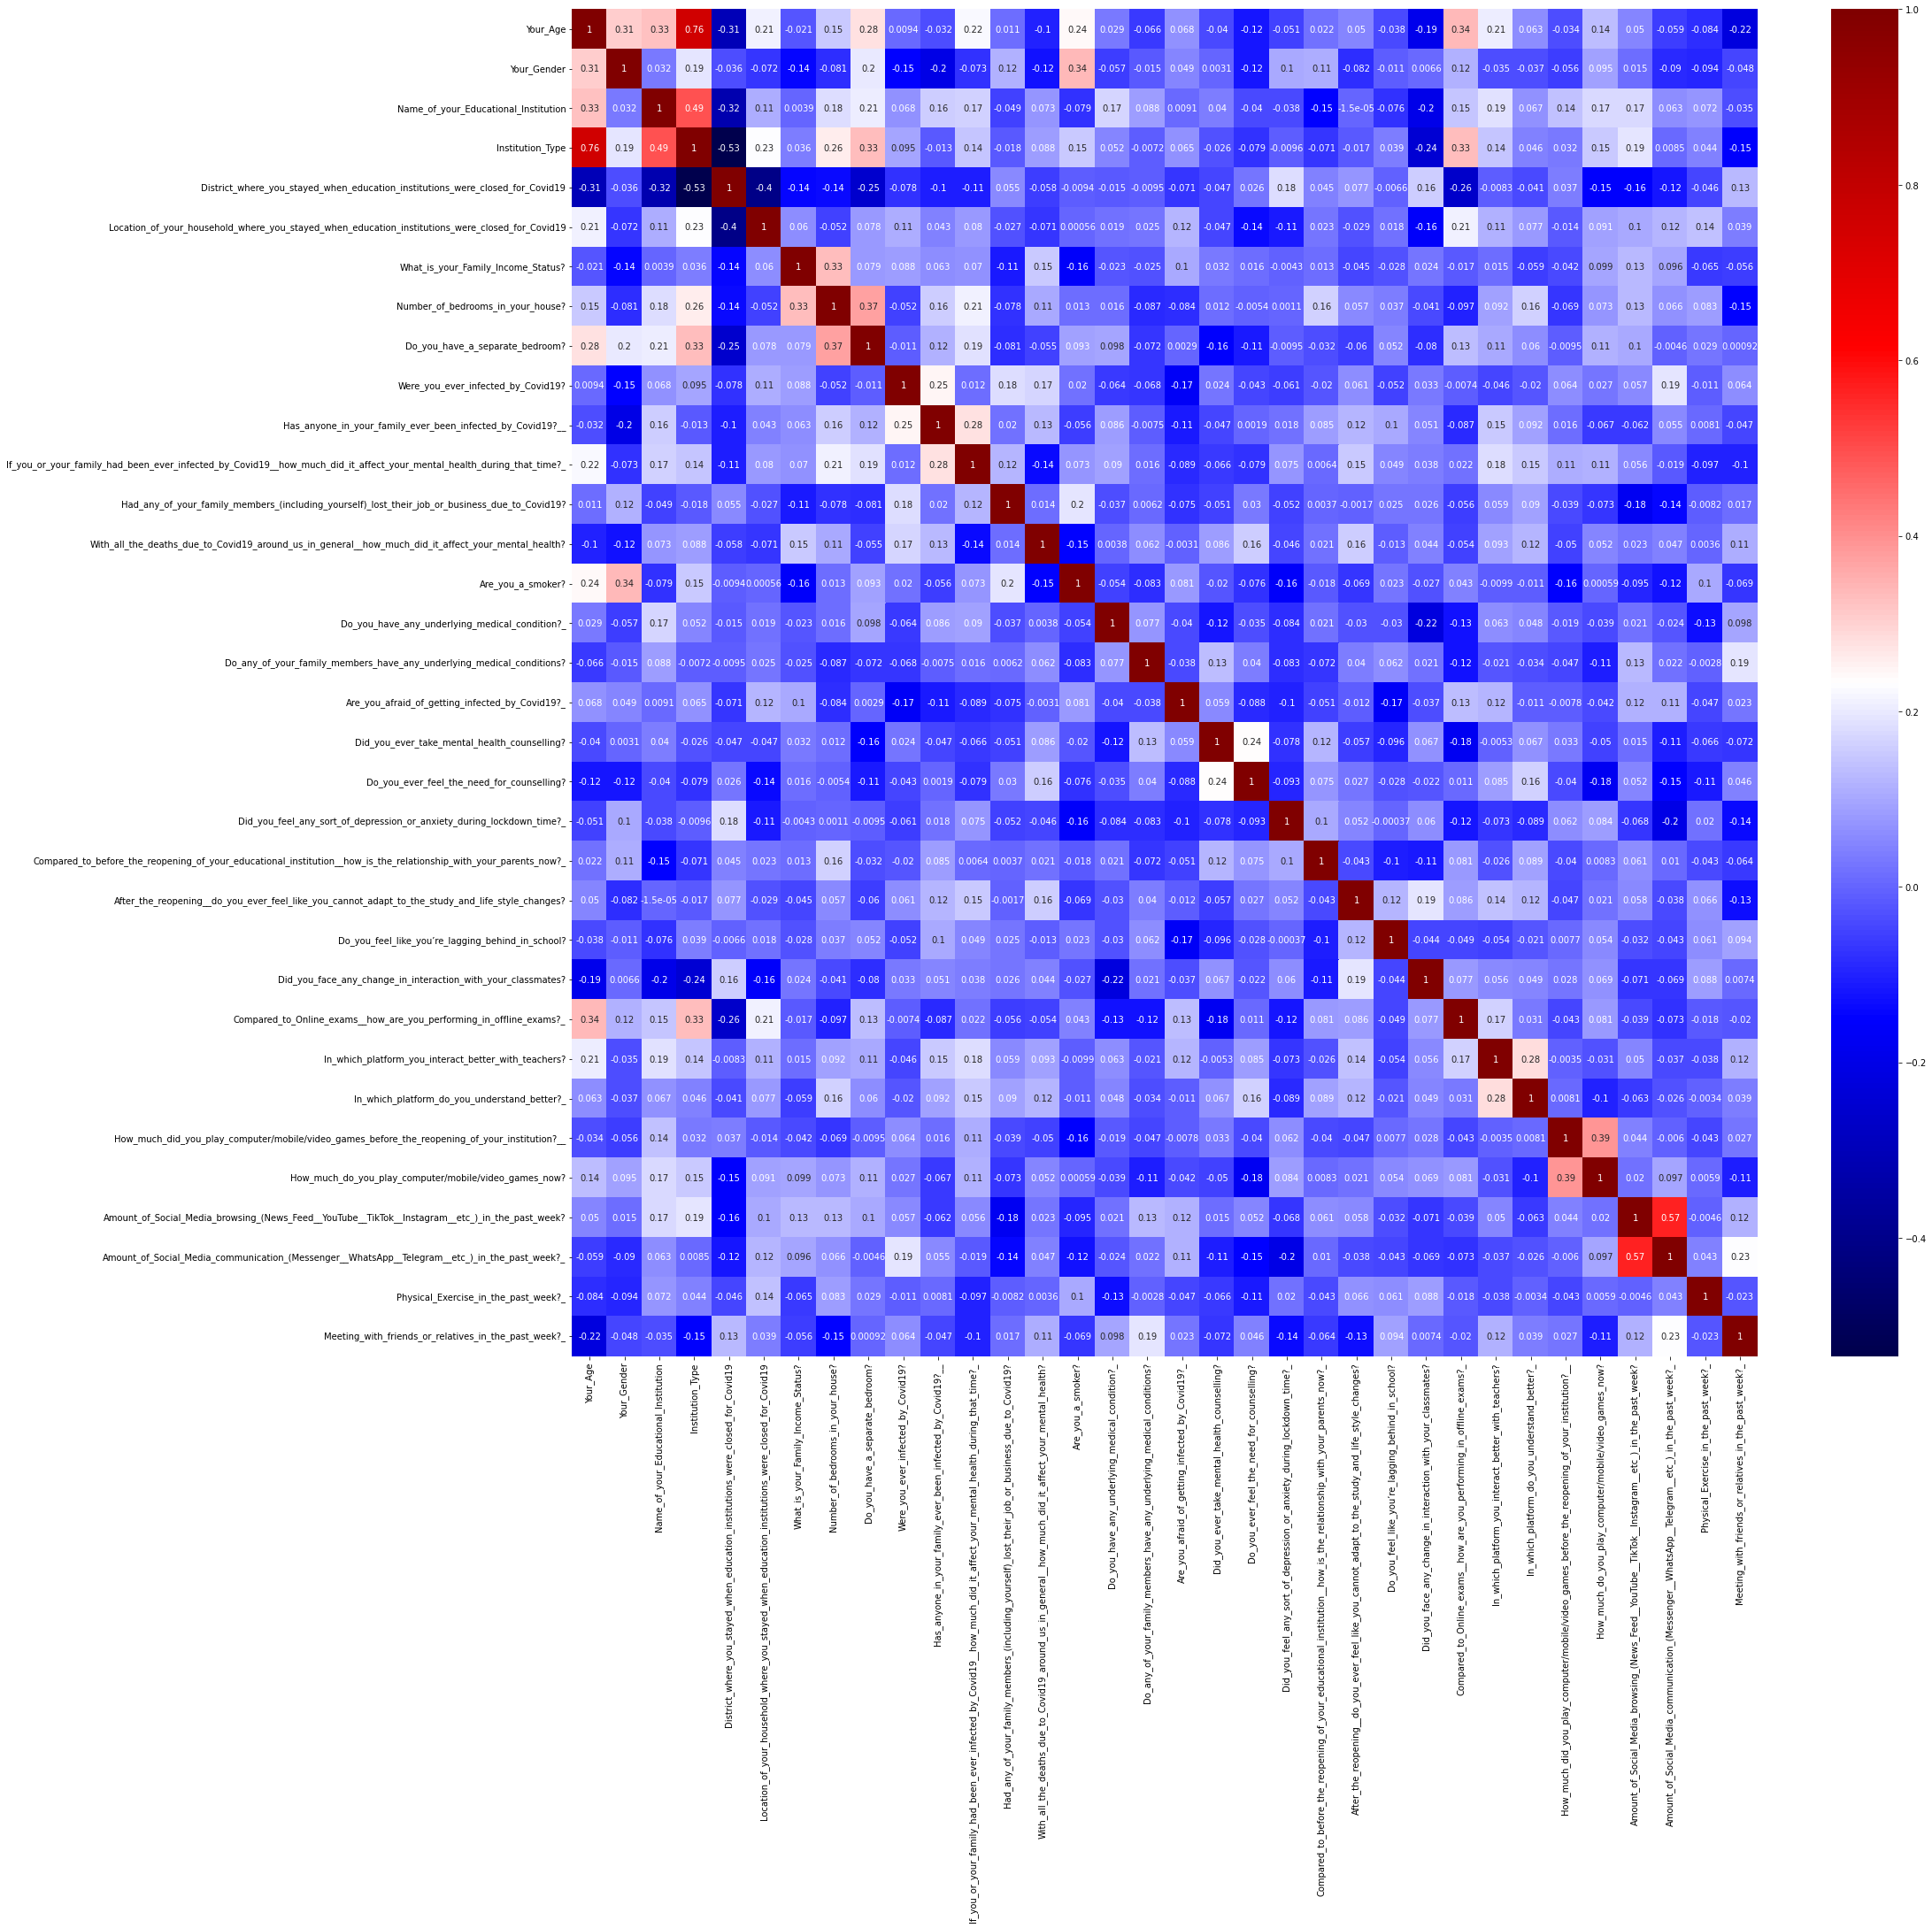

In [ ]:
plt.figure(figsize = (30,28))
sns.heatmap(corr, annot = True, cmap = "seismic");

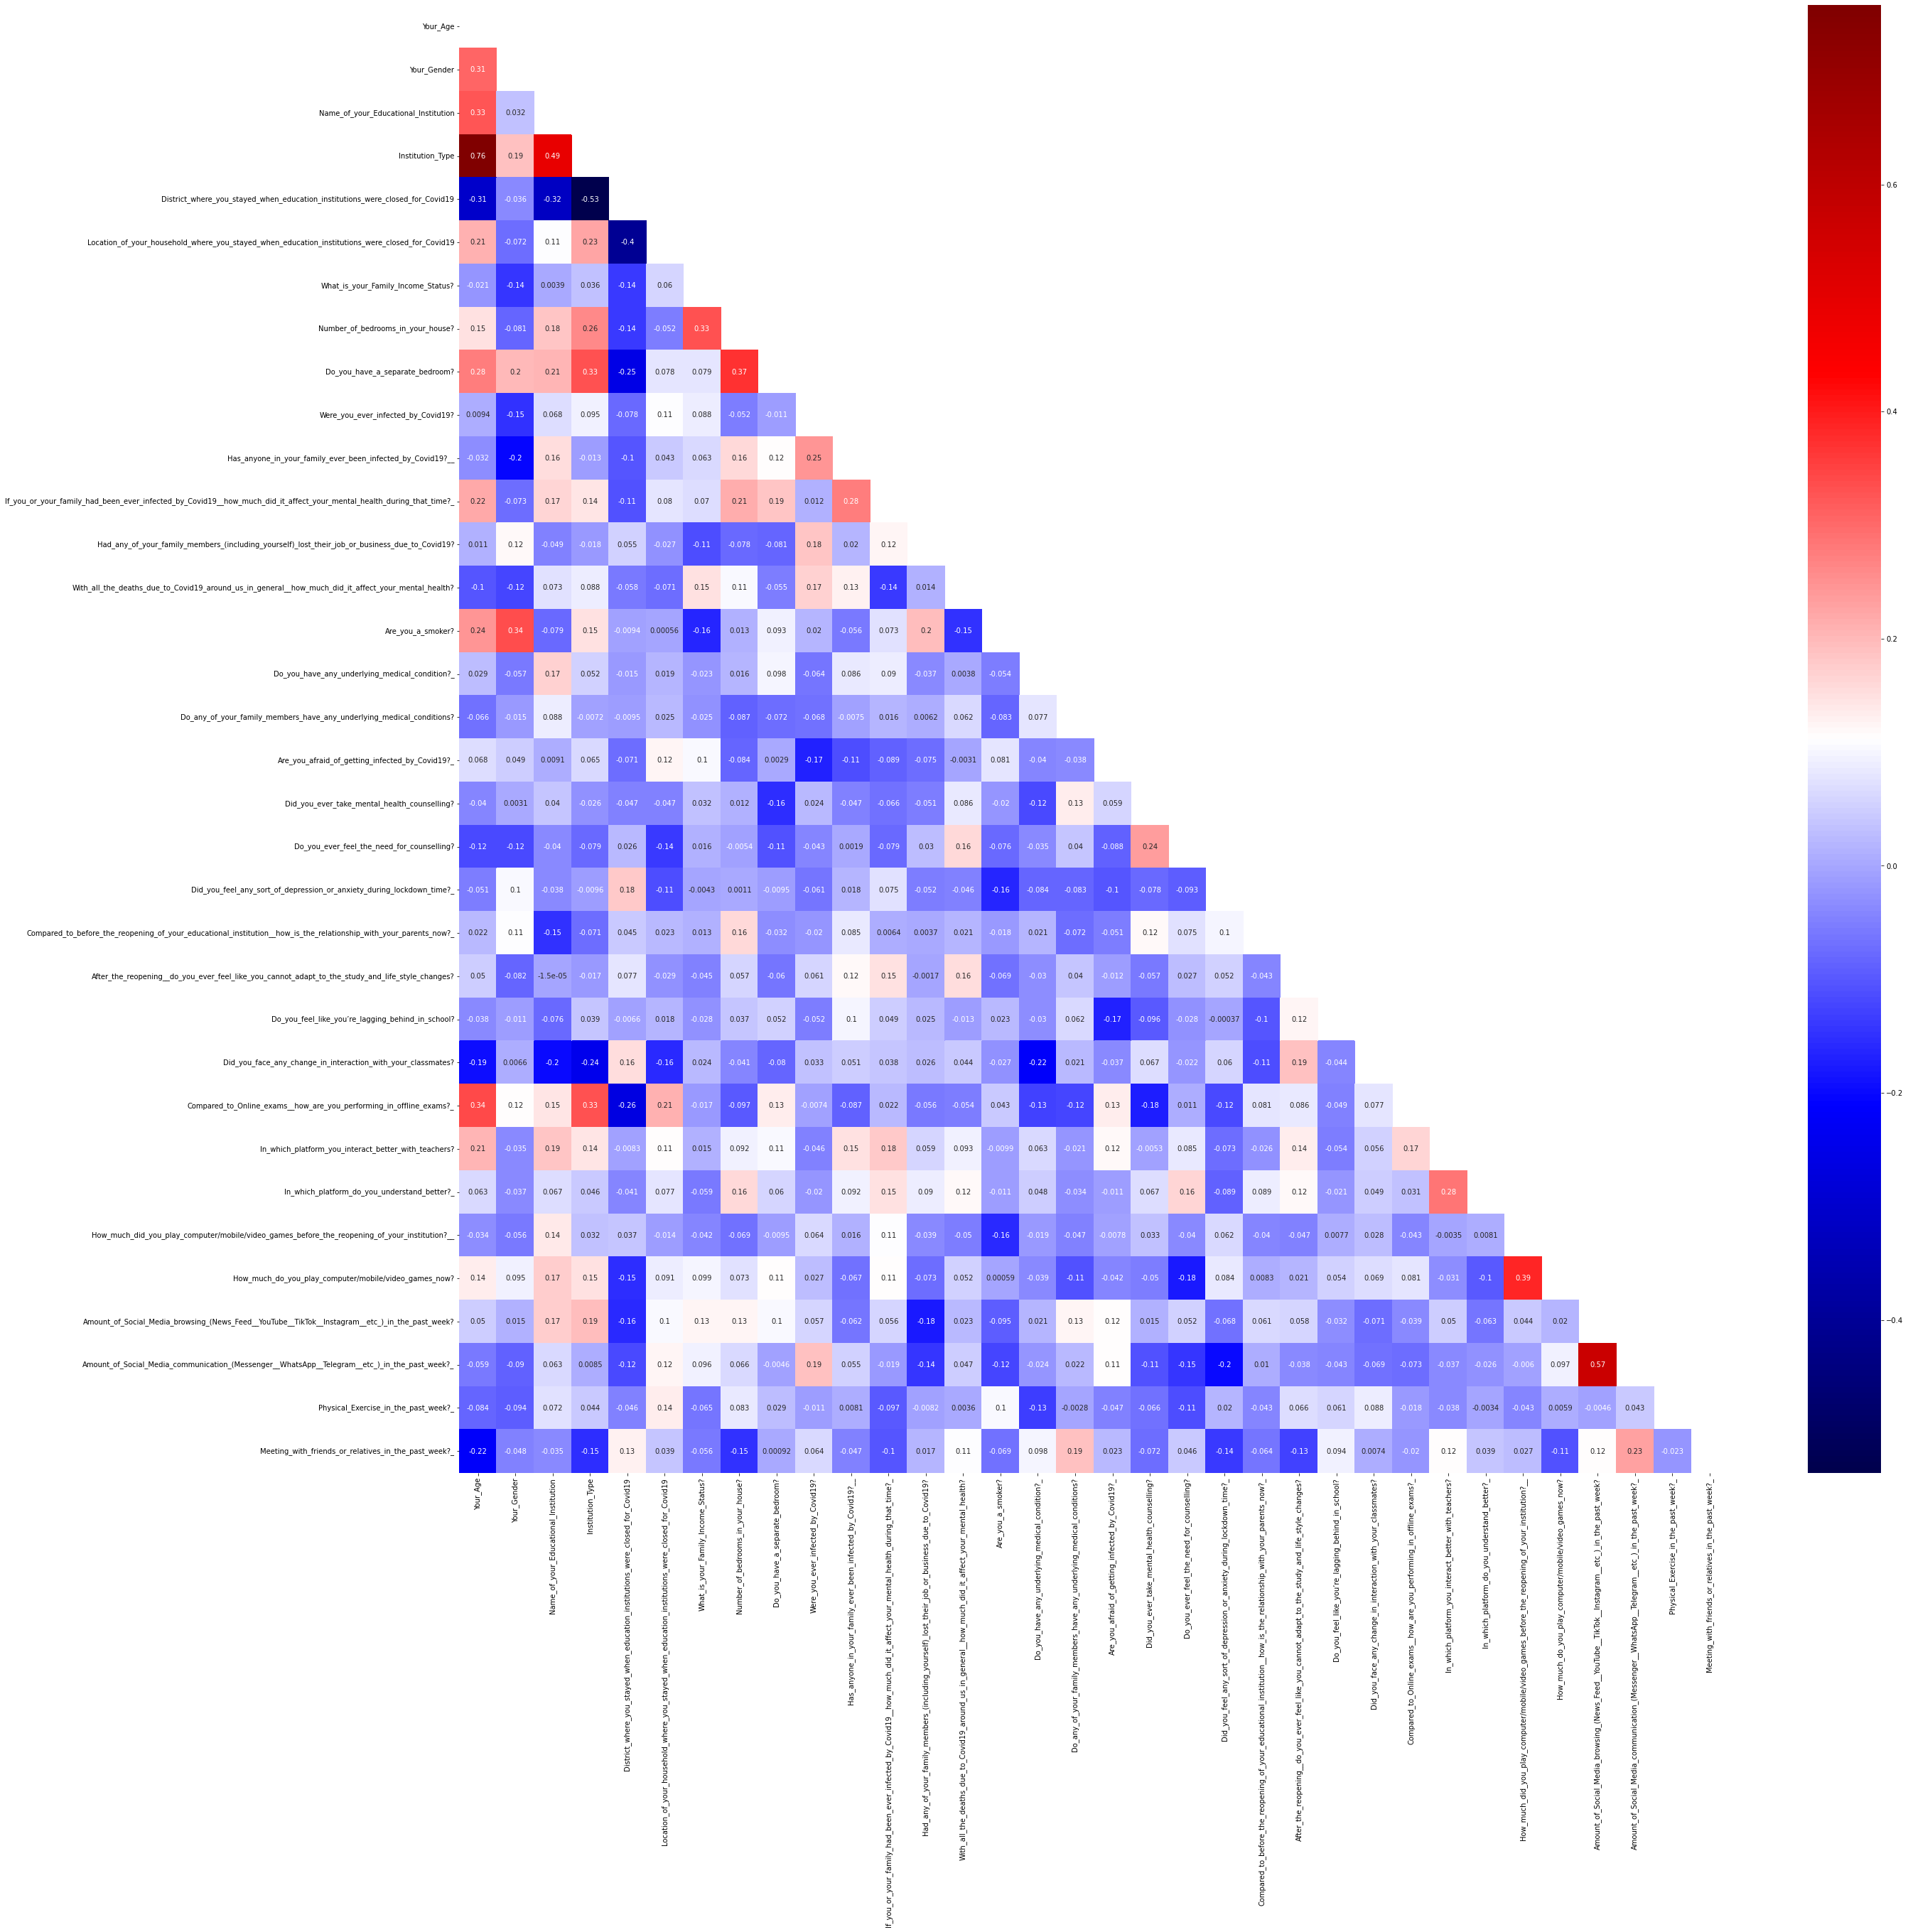

In [ ]:
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (40,38))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1);

In [ ]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if(abs(corr_matrix.iloc[i, j])) > threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr


In [ ]:
corr_features = correlation(X_train, 0.7) # already .9, .8, .7 and .6 have chacked
print(len(corr_features))
print(corr_features)

1
{'Institution_Type'}


SVM


In [ ]:
from sklearn import svm
model = svm.SVC(kernel = 'rbf', C = 30, gamma = 'auto')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.40540540540540543

LighBGM


In [ ]:
import lightgbm
from sklearn import metrics
from sklearn.metrics import precision_score

In [ ]:
model = lightgbm.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's multi_logloss: 1.1027	training's multi_logloss: 1.1027	valid_0's multi_logloss: 1.64044	valid_0's multi_logloss: 1.64044
[40]	training's multi_logloss: 0.803761	training's multi_logloss: 0.803761	valid_0's multi_logloss: 1.69608	valid_0's multi_logloss: 1.69608
[60]	training's multi_logloss: 0.612015	training's multi_logloss: 0.612015	valid_0's multi_logloss: 1.81536	valid_0's multi_logloss: 1.81536
[80]	training's multi_logloss: 0.46745	training's multi_logloss: 0.46745	valid_0's multi_logloss: 1.94116	valid_0's multi_logloss: 1.94116
[100]	training's multi_logloss: 0.361817	training's multi_logloss: 0.361817	valid_0's multi_logloss: 2.05095	valid_0's multi_logloss: 2.05095


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [ ]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.9863
Testing accuracy 0.2432


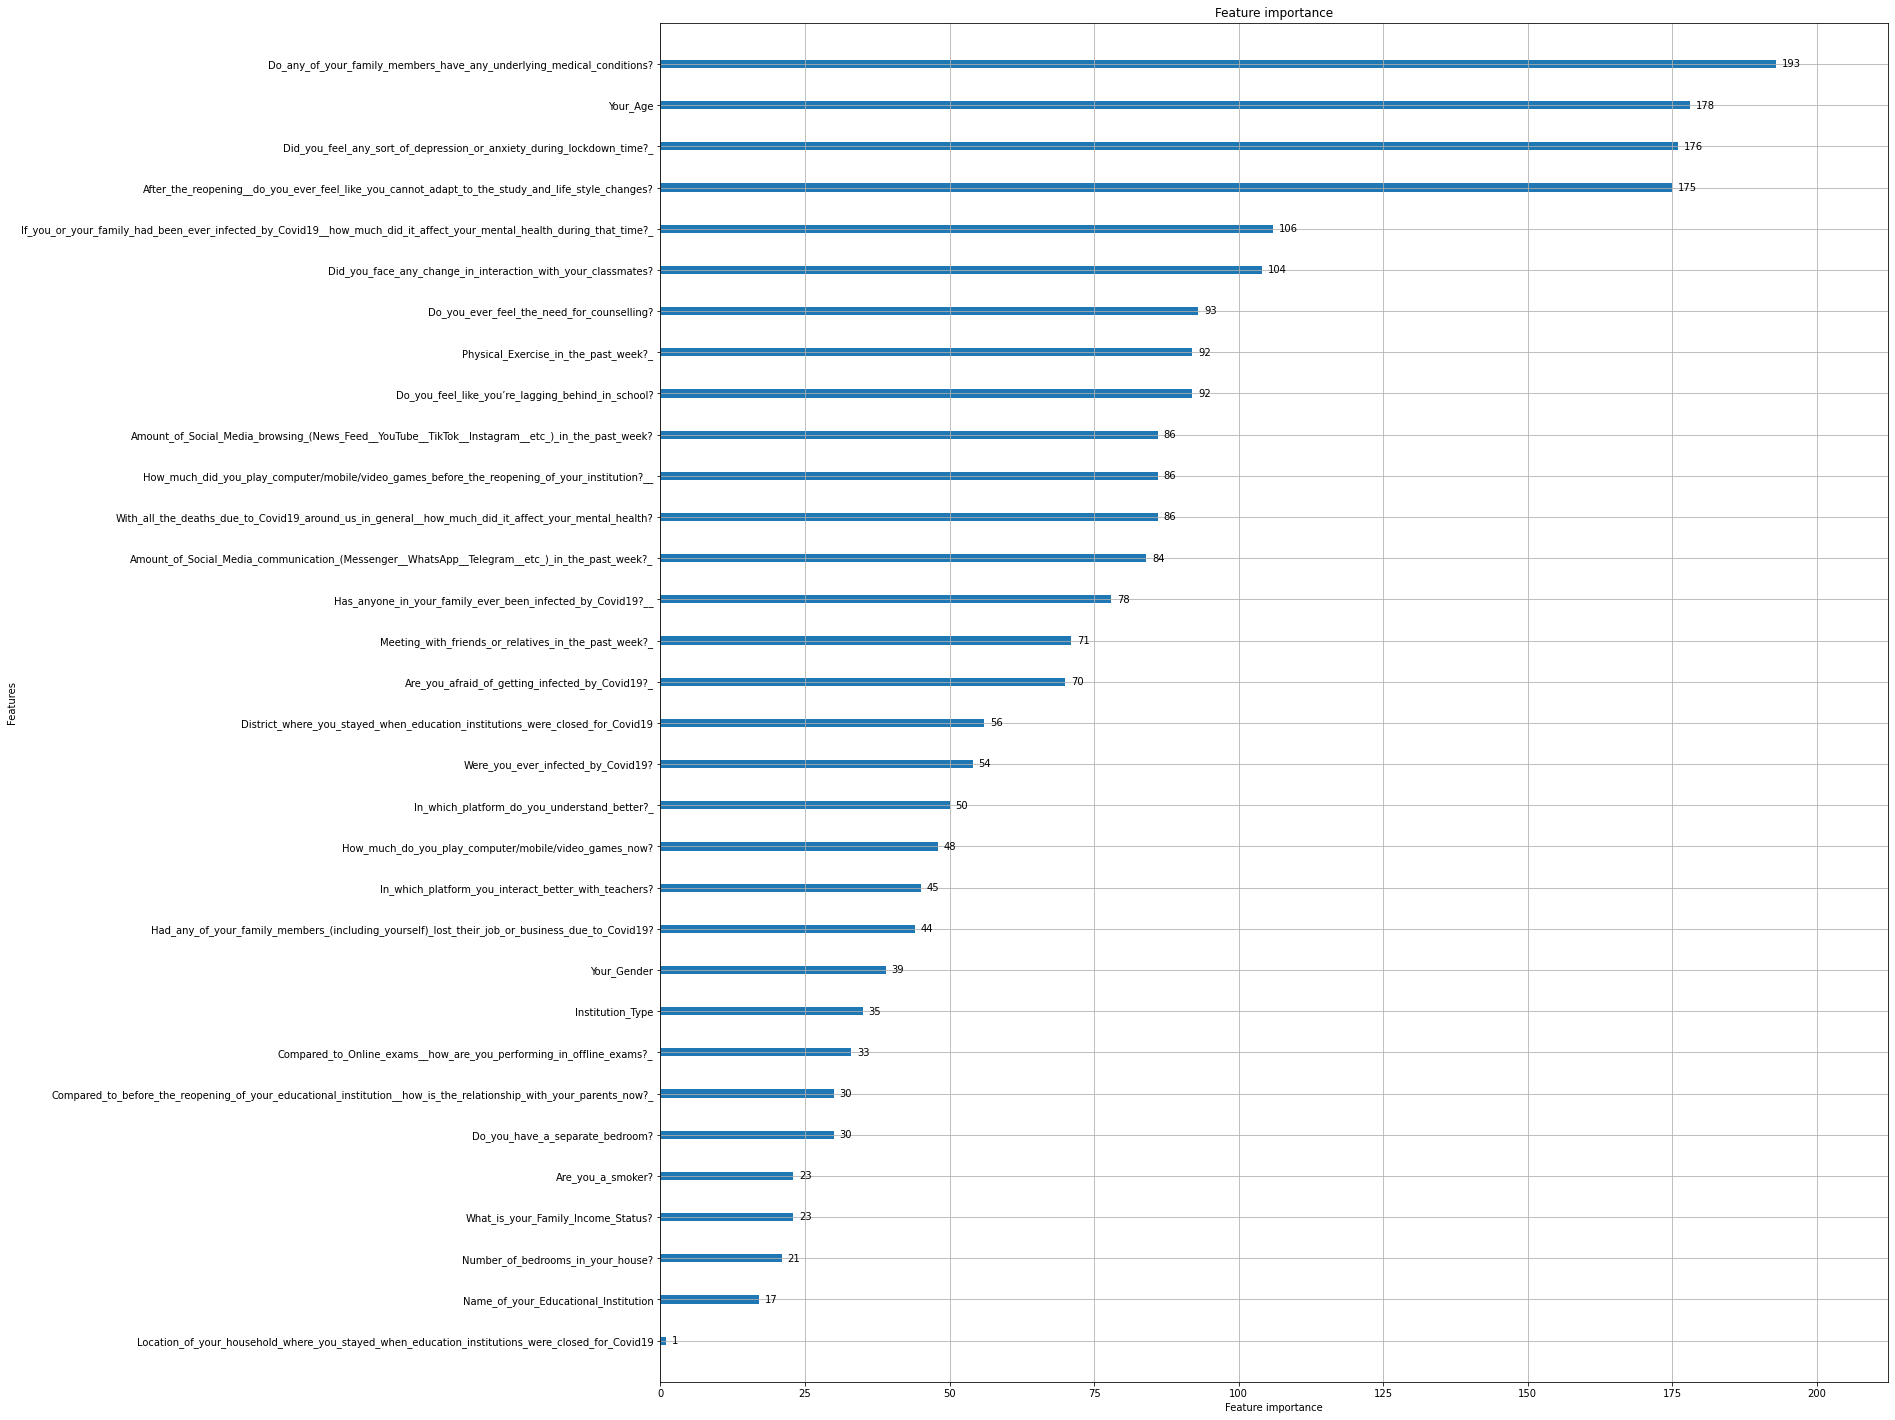

In [ ]:
lightgbm.plot_importance(model).figure.set_size_inches(22, 25)

KNN

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[7 0 0 1 1]
 [1 1 1 0 1]
 [3 2 1 1 0]
 [3 0 0 3 2]
 [2 1 1 5 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.78      0.56         9
           1       0.25      0.25      0.25         4
           2       0.33      0.14      0.20         7
           3       0.30      0.38      0.33         8
           4       0.00      0.00      0.00         9

    accuracy                           0.32        37
   macro avg       0.26      0.31      0.27        37
weighted avg       0.26      0.32      0.27        37

Accuracy: 0.32432432432432434


K-Nearest

X shape: (183, 34)
y shape: (183,)
K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.32432432432432434 , Difference =  67.56756756756756 %
K =  5 , Training Accuracy =  0.5205479452054794  Test Accuracy =  0.2972972972972973 , Difference =  22.32506479081821 %
K =  10 , Training Accuracy =  0.4931506849315068  Test Accuracy =  0.32432432432432434 , Difference =  16.882636060718248 %
K =  15 , Training Accuracy =  0.4246575342465753  Test Accuracy =  0.2972972972972973 , Difference =  12.7360236949278 %
K =  20 , Training Accuracy =  0.410958904109589  Test Accuracy =  0.2972972972972973 , Difference =  11.36616068122917 %
K =  25 , Training Accuracy =  0.3904109589041096  Test Accuracy =  0.3783783783783784 , Difference =  1.2032580525731196 %
K =  30 , Training Accuracy =  0.3972602739726027  Test Accuracy =  0.32432432432432434 , Difference =  7.293594964827838 %
K =  35 , Training Accuracy =  0.3767123287671233  Test Accuracy =  0.2972972972972973 , Difference =  7.9415031469825

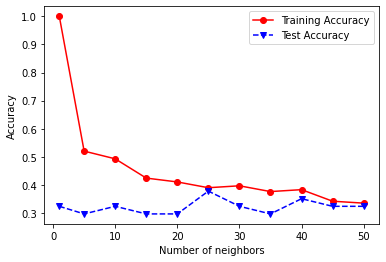

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

numNeighbors = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

# Predict Anxiety

In [ ]:
lbl_encode.dropna(inplace = True)
print(lbl_encode.shape)

(183, 36)


In [ ]:
lbl_encode_anxiety = lbl_encode.copy()

SVM


In [ ]:
lbl_encode_anxiety = lbl_encode_anxiety.drop(columns = 'depression_level')
y = lbl_encode_anxiety['Anxiety_level']
X = lbl_encode_anxiety.drop(columns = 'Anxiety_level')


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 5)

In [ ]:
X_train.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,Did_you_face_any_change_in_interaction_with_your_classmates?,Compared_to_Online_exams__how_are_you_performing_in_offline_exams?_,In_which_platform_you_interact_better_with_teachers?,In_which_platform_do_you_understand_better?_,How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__,How_much_do_you_play_computer/mobile/video_games_now?,Amount_of_Social_Media_browsing_(News_Feed__YouTube__TikTok__Instagram__etc_)_in_the_past_week?,Amount_of_Social_Media_communication_(Messenger__WhatsApp__Telegram__etc_)_in_the_past_week?_,Physical_Exercise_in_the_past_week?_,Meeting_with_friends_or_relatives_in_the_past_week?_
125,0.615385,1,22,2,4,3,5,3,2,2,...,3,0,2,2,2,3,0,0,3,1
86,0.538462,0,22,2,4,3,2,2,2,1,...,0,0,0,2,0,1,3,3,1,3
30,0.307692,0,17,0,21,2,5,3,1,1,...,2,0,1,2,0,2,0,3,3,3
65,0.461538,0,22,2,25,2,2,2,2,1,...,0,1,2,2,3,2,1,0,3,0
44,0.307692,0,17,0,21,3,1,2,1,1,...,3,0,2,0,1,3,0,0,2,0


In [ ]:
from sklearn import svm
model = svm.SVC(kernel = 'rbf', C = 30, gamma = 'auto')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.358695652173913

lighLGBM

In [ ]:
import lightgbm
from sklearn import metrics
from sklearn.metrics import precision_score

In [ ]:
model = lightgbm.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
model.fit(X_train,y_train,eval_set=[(X_test,y_test),(X_train,y_train)],
          verbose=20,eval_metric='logloss')

[20]	training's multi_logloss: 0.974363	training's multi_logloss: 0.974363	valid_0's multi_logloss: 1.31515	valid_0's multi_logloss: 1.31515
[40]	training's multi_logloss: 0.795985	training's multi_logloss: 0.795985	valid_0's multi_logloss: 1.34957	valid_0's multi_logloss: 1.34957
[60]	training's multi_logloss: 0.677868	training's multi_logloss: 0.677868	valid_0's multi_logloss: 1.40678	valid_0's multi_logloss: 1.40678
[80]	training's multi_logloss: 0.572279	training's multi_logloss: 0.572279	valid_0's multi_logloss: 1.48371	valid_0's multi_logloss: 1.48371
[100]	training's multi_logloss: 0.488919	training's multi_logloss: 0.488919	valid_0's multi_logloss: 1.55283	valid_0's multi_logloss: 1.55283


LGBMClassifier(learning_rate=0.09, max_depth=-5, random_state=42)

In [ ]:
print('Training accuracy {:.4f}'.format(model.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(model.score(X_test,y_test)))

Training accuracy 0.9670
Testing accuracy 0.3370


K-Nearest

X shape: (183, 34)
y shape: (183,)
K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.22826086956521738 , Difference =  77.17391304347827 %
K =  5 , Training Accuracy =  0.4835164835164835  Test Accuracy =  0.33695652173913043 , Difference =  14.65599617773531 %
K =  10 , Training Accuracy =  0.5274725274725275  Test Accuracy =  0.31521739130434784 , Difference =  21.225513616817963 %
K =  15 , Training Accuracy =  0.4725274725274725  Test Accuracy =  0.29347826086956524 , Difference =  17.90492116579073 %
K =  20 , Training Accuracy =  0.4175824175824176  Test Accuracy =  0.3695652173913043 , Difference =  4.801720019111327 %
K =  25 , Training Accuracy =  0.4175824175824176  Test Accuracy =  0.33695652173913043 , Difference =  8.062589584328716 %
K =  30 , Training Accuracy =  0.4175824175824176  Test Accuracy =  0.358695652173913 , Difference =  5.888676540850457 %
K =  35 , Training Accuracy =  0.38461538461538464  Test Accuracy =  0.34782608695652173 , Difference =  3.678929765

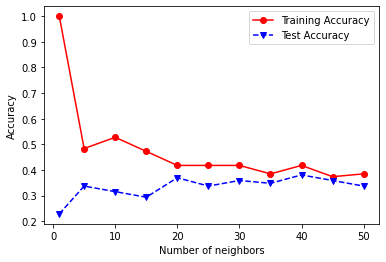

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

numNeighbors = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy');

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index], 
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

# Data Visualization


In [ ]:
df_final.head()

,Your_Age,Your_Gender,Name_of_your_Educational_Institution,Institution_Type,District_where_you_stayed_when_education_institutions_were_closed_for_Covid19,Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19,What_is_your_Family_Income_Status?,Number_of_bedrooms_in_your_house?,Do_you_have_a_separate_bedroom?,Were_you_ever_infected_by_Covid19?,...,In_which_platform_you_interact_better_with_teachers?,In_which_platform_do_you_understand_better?_,How_much_did_you_play_computer/mobile/video_games_before_the_reopening_of_your_institution?__,How_much_do_you_play_computer/mobile/video_games_now?,Amount_of_Social_Media_browsing_(News_Feed__YouTube__TikTok__Instagram__etc_)_in_the_past_week?,Amount_of_Social_Media_communication_(Messenger__WhatsApp__Telegram__etc_)_in_the_past_week?_,Physical_Exercise_in_the_past_week?_,Meeting_with_friends_or_relatives_in_the_past_week?_,depression_level,Anxiety_level
0,15,Female,Viqarunnisa Noon School And College,School,Dhaka,Urban,Middle class,3 bedrooms,Yes,No,...,Offline,Offline,None,None,Extreme (more than 1 hour per day),Extreme (more than 1 hour per day),Daily,More times,Mild depression,Minimal anxiety
1,16,Female,Motijheel Govt Girls High School,School,Dhaka,Urban,Middle class,2 bedrooms,No,No,...,Online,Online,Slightly,Slightly,Moderately (31-60 mins per day),Moderately (31-60 mins per day),Slightly,4-7 times,Minimal depression,Minimal anxiety
2,17,Male,Birshreshtha Munshi Abdur Rouf Public College,College,Dhaka,Urban,Prefer Not to say,2 bedrooms,Yes,No,...,Both,Both,Moderately,Moderately,Moderately (31-60 mins per day),Moderately (31-60 mins per day),None,None,Moderately severe depression,Moderate anxiety
3,17,Male,Scholar's School and College,College,Dhaka,Urban,Upper-Middle class,3 bedrooms,Yes,Maybe,...,Offline,None,Extreme,Extreme,Extreme (more than 1 hour per day),Extreme (more than 1 hour per day),Moderately,4-7 times,Severe depression,Severe anxiety
4,17,Male,Noakhali Government college,College,Noakhali,Upazila,Middle class,4 bedrooms or greater,Yes,No,...,Both,Offline,Extreme,Moderately,Extreme (more than 1 hour per day),Extreme (more than 1 hour per day),Slightly,4-7 times,Severe depression,Severe anxiety


In [ ]:
temp = df_final
features = temp.columns.values.tolist()
print(features)

['Your_Age', 'Your_Gender', 'Name_of_your_Educational_Institution', 'Institution_Type', 'District_where_you_stayed_when_education_institutions_were_closed_for_Covid19', 'Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19', 'What_is_your_Family_Income_Status?', 'Number_of_bedrooms_in_your_house?', 'Do_you_have_a_separate_bedroom?', 'Were_you_ever_infected_by_Covid19?', 'Has_anyone_in_your_family_ever_been_infected_by_Covid19?__', 'If_you_or_your_family_had_been_ever_infected_by_Covid19__how_much_did_it_affect_your_mental_health_during_that_time?_', 'Had_any_of_your_family_members_(including_yourself)_lost_their_job_or_business_due_to_Covid19?', 'With_all_the_deaths_due_to_Covid19_around_us_in_general__how_much_did_it_affect_your_mental_health?', 'Are_you_a_smoker?', 'Do_you_have_any_underlying_medical_condition?_', 'Do_any_of_your_family_members_have_any_underlying_medical_conditions?', 'Are_you_afraid_of_getting_infected_by_Covid19?_', 'Did_

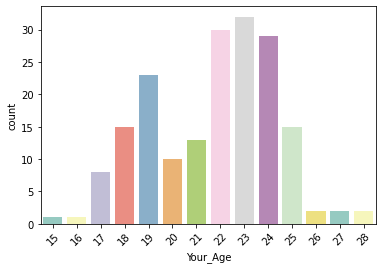

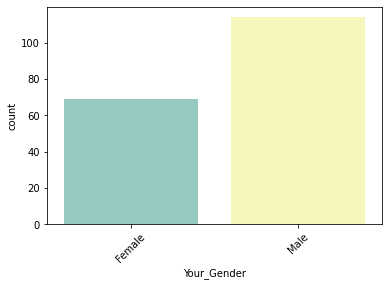

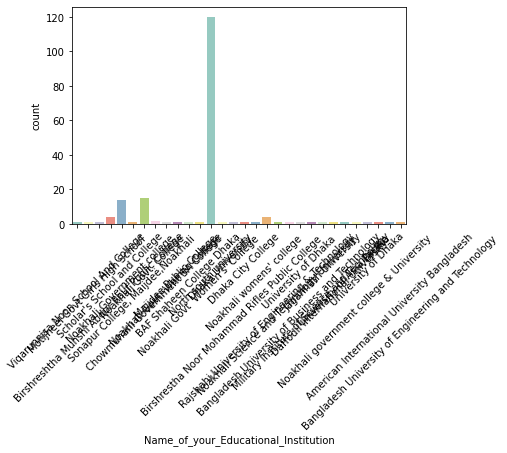

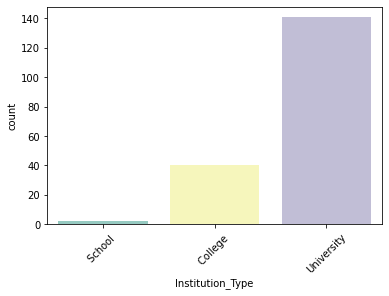

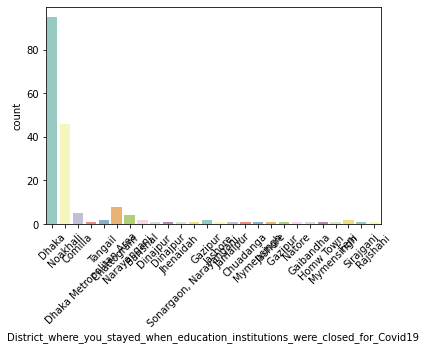

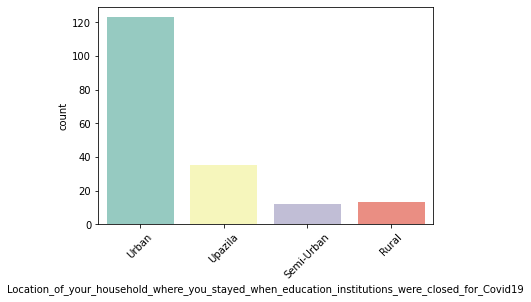

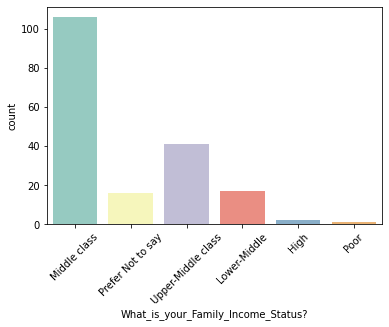

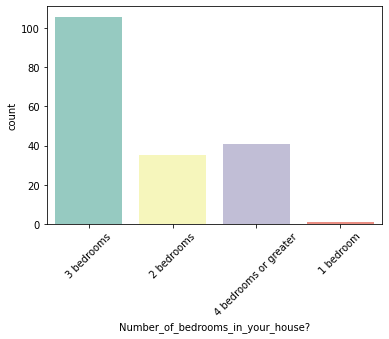

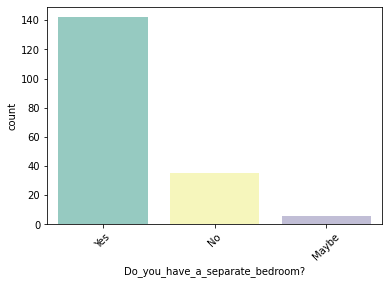

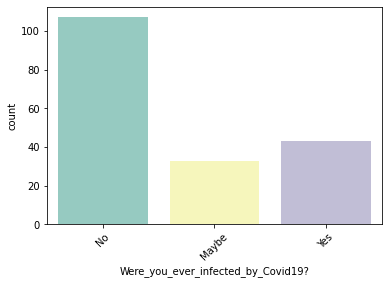

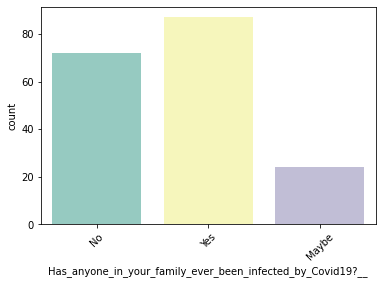

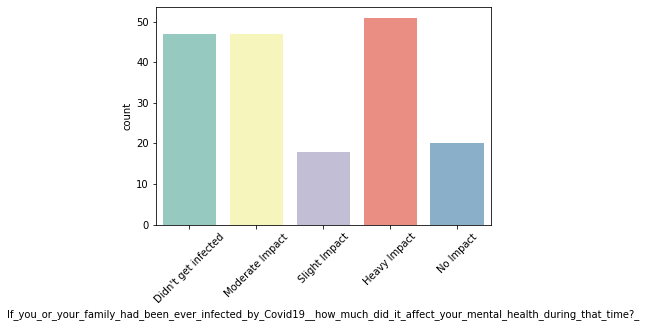

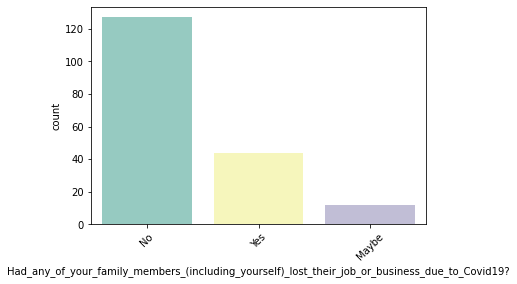

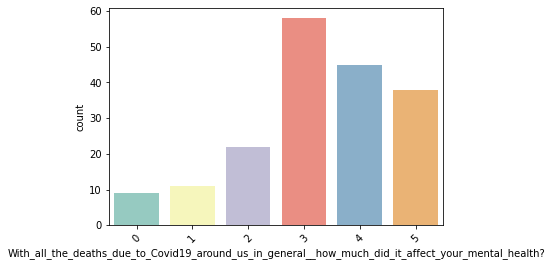

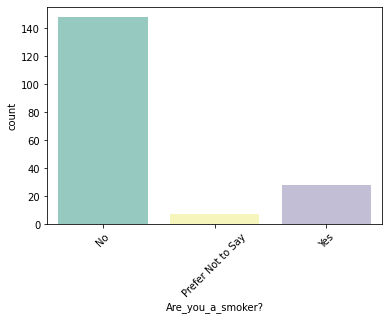

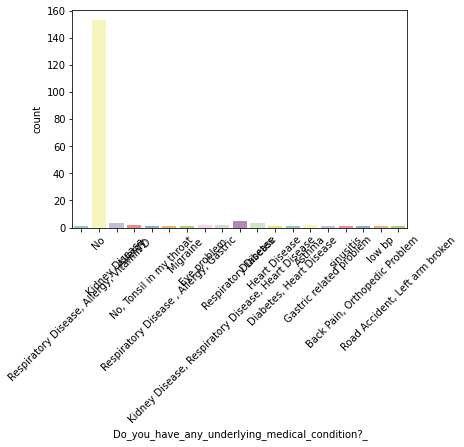

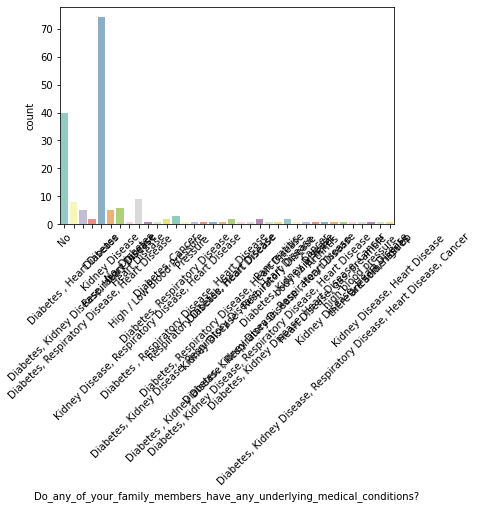

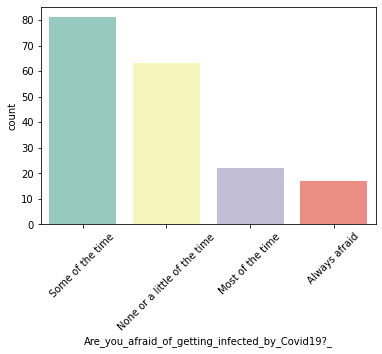

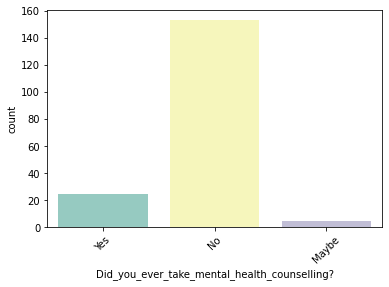

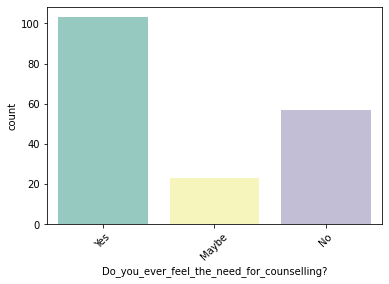

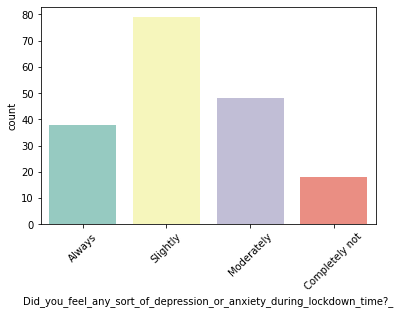

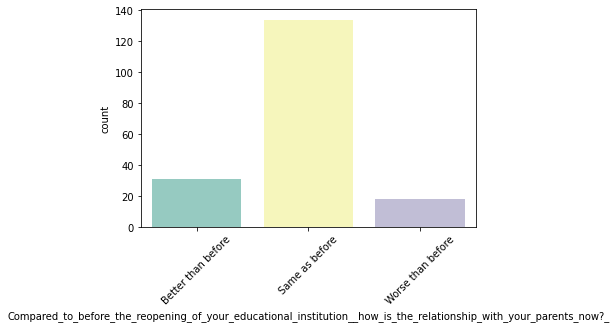

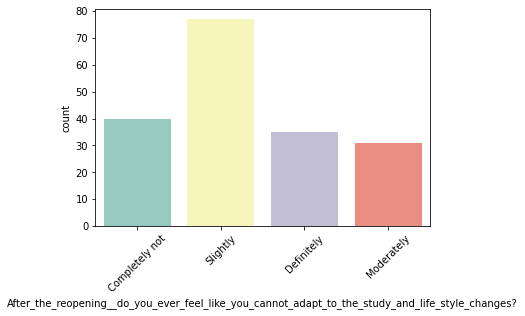

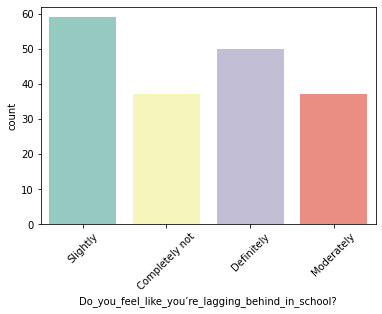

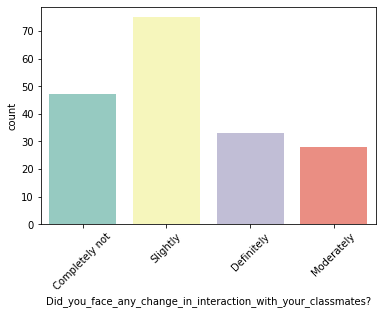

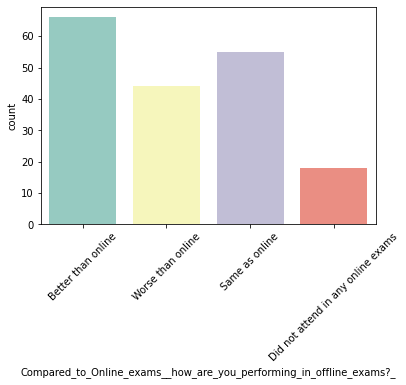

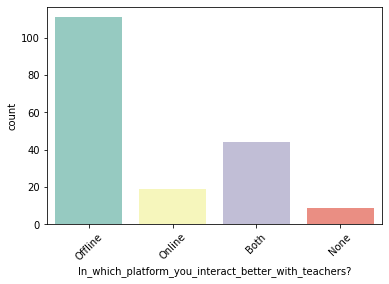

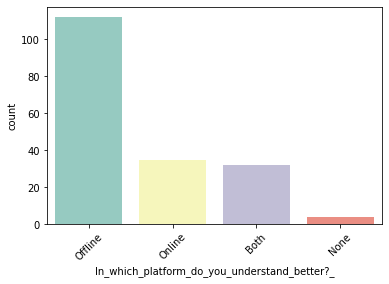

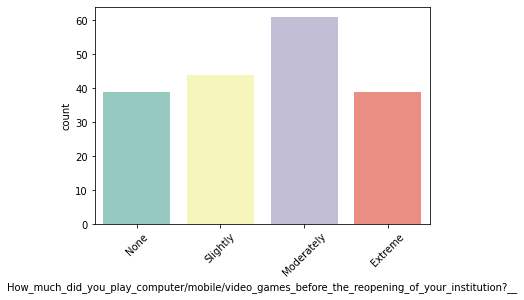

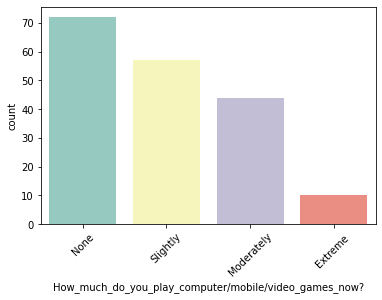

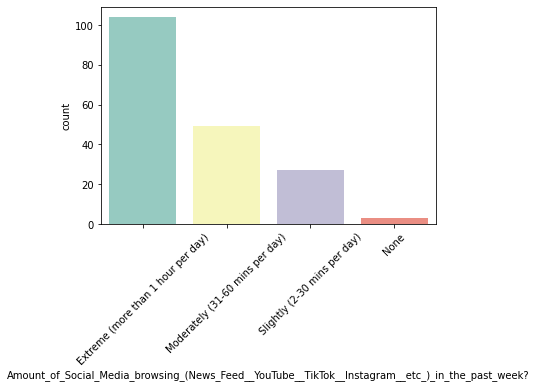

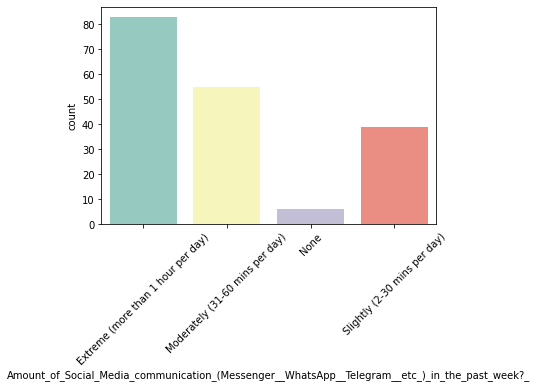

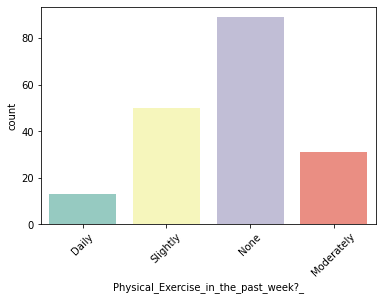

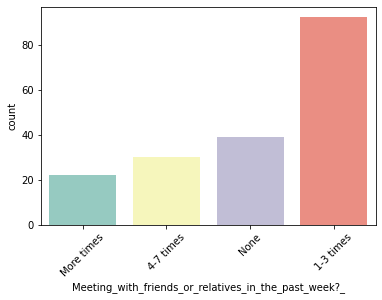

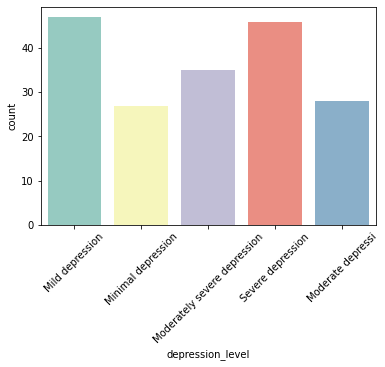

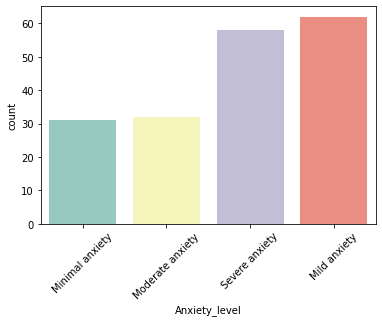

In [ ]:
 #Looping through all the features and plotting bar chart of each of the categorical features


for f in features:
    sns.countplot(x = f, data = df_final, palette = 'Set3')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
Age_df = df_final['Your_Age'].value_counts().rename_axis('sub_cat_values').reset_index(name='counts')
Age_df.head()


,sub_cat_values,counts
0,23,32
1,22,30
2,24,29
3,19,23
4,18,15


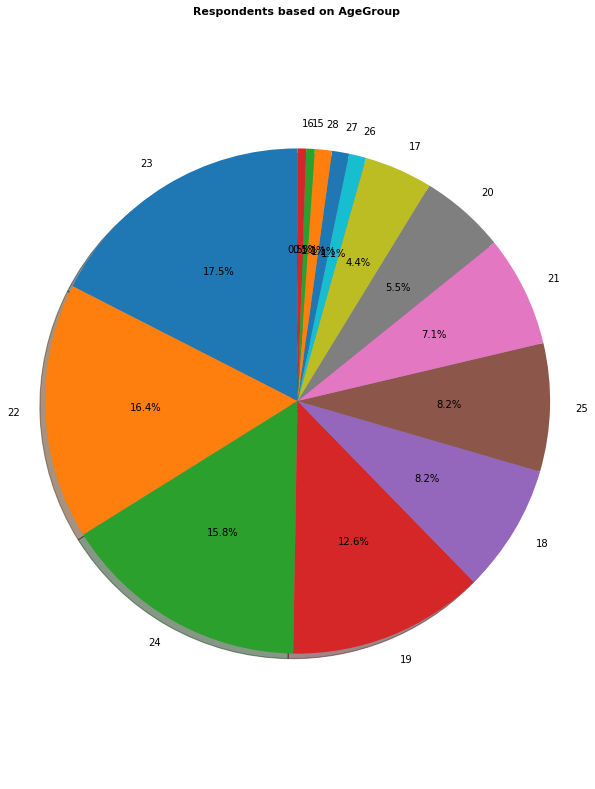

In [ ]:
# Pie chart
labels = Age_df.sub_cat_values
Age_Class = df_final.groupby('Your_Age').count()
sizes = Age_df.counts

fig1, ax1 = plt.subplots(figsize=[10, 14])
ax1.pie(sizes,labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Respondents based on AgeGroup', fontdict={'fontsize': 11, 'fontweight': 'bold'})

# plt.legend(labels=labels)
plt.show()

# BoxPlot of Depression level according to Age in Different Types of Location in BD:

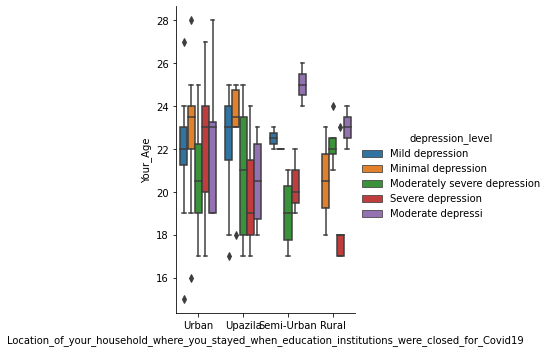

In [ ]:

ax = sns.catplot(x="Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19", y="Your_Age", hue="depression_level", kind="box", data=df_final)

# BoxPlot of Anxiety Level according to Age in Different Types of Location in BD:

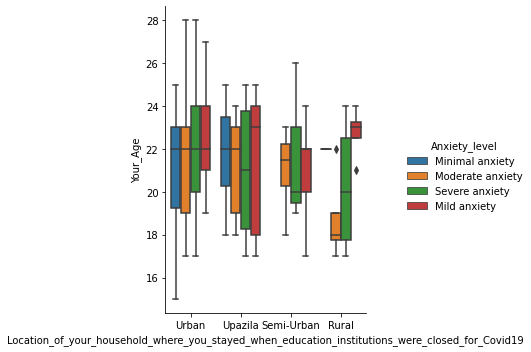

In [ ]:
ax = sns.catplot(x="Location_of_your_household_where_you_stayed_when_education_institutions_were_closed_for_Covid19", y="Your_Age", hue="Anxiety_level", kind="box", data=df_final)

# BoxPlot of Depression according to Age for different types of Education Institiutes:

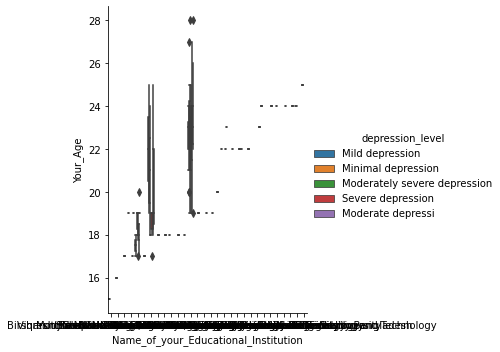

In [ ]:
ax = sns.catplot(x="Name_of_your_Educational_Institution", y="Your_Age", hue="depression_level", kind="box", data=df_final)

# BoxPlot of Depression according to Age for different types of Education Institiutes:

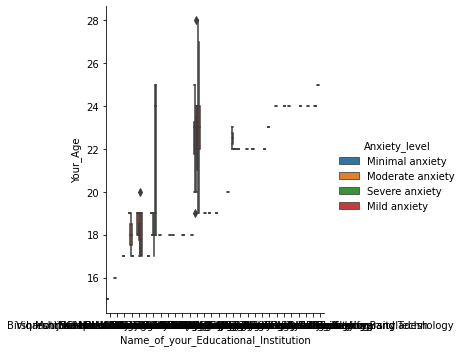

In [ ]:
ax = sns.catplot(x="Name_of_your_Educational_Institution", y="Your_Age", hue="Anxiety_level", kind="box", data=df_final)

# Violinplots of Depression Level according to Age in based on if the Individual was Affected by Covid19 or not:

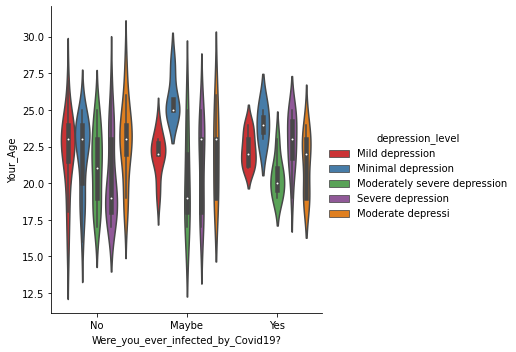

In [ ]:
sns.catplot(x="Were_you_ever_infected_by_Covid19?", y="Your_Age", hue="depression_level",
            kind="violin", split=False, data=df_final, palette="Set1")

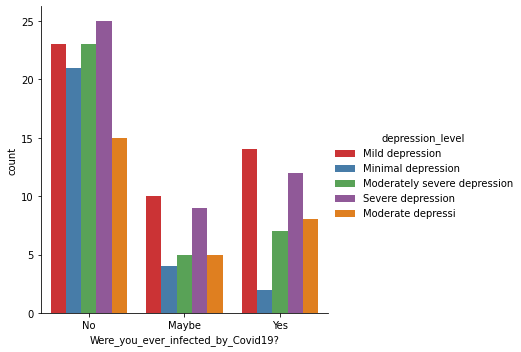

In [ ]:
sns.catplot(x="Were_you_ever_infected_by_Covid19?", hue="depression_level",
            kind="count", data=df_final, palette="Set1")

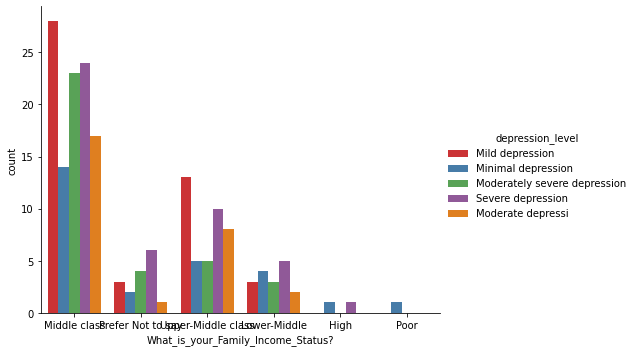

In [ ]:
sns.catplot(x="What_is_your_Family_Income_Status?", hue="depression_level",
            kind="count", data=df_final, palette="Set1", aspect = 1.3)

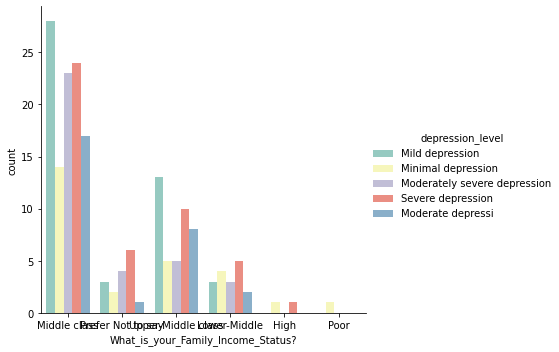

In [ ]:
sns.catplot(x="What_is_your_Family_Income_Status?", hue="depression_level",
            kind="count", data=df_final, palette="Set3", aspect = 1.1)

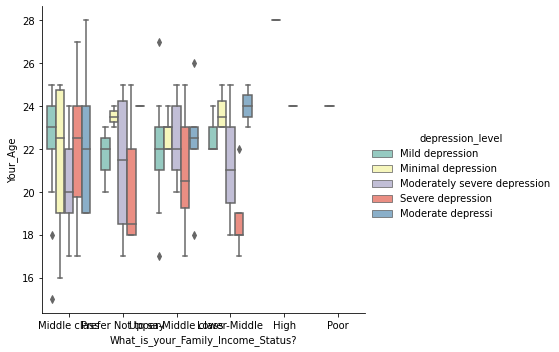

In [ ]:
sns.catplot(x="What_is_your_Family_Income_Status?", y="Your_Age", hue="depression_level",
            kind="box",  data=df_final, palette="Set3", aspect = 1.1 )

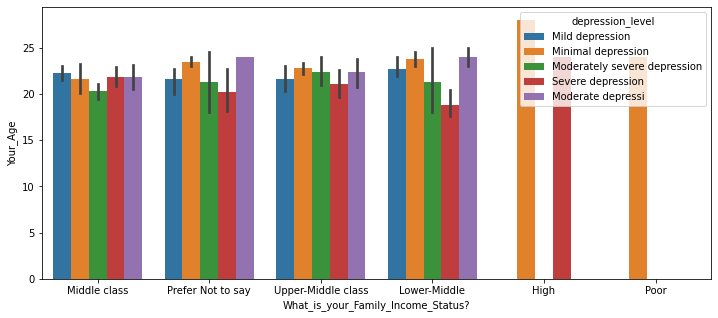

In [ ]:
plt.figure(figsize=(12,5))
ax = sns.barplot(x="What_is_your_Family_Income_Status?", y="Your_Age", hue="depression_level", data=df_final)

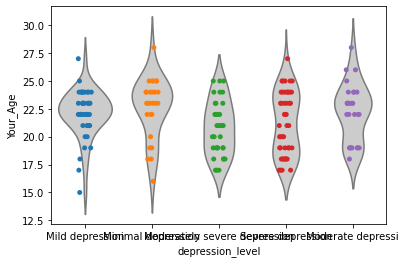

In [ ]:
ax = sns.violinplot(x="depression_level", y="Your_Age", data=df_final, inner=None, color=".8")
ax = sns.stripplot(x="depression_level", y="Your_Age", data=df_final)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self._figure.tight_layout(*args, **kwargs)


<Figure size 360x288 with 0 Axes>

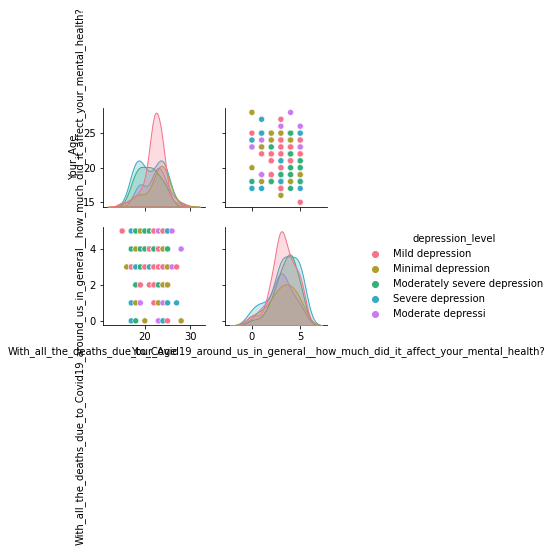

In [ ]:
# By Vaccine Acceptance Type
plt.figure(figsize=(5,4))
sns.pairplot(df_final,hue = 'depression_level',diag_kind = "kde",kind = "scatter",palette = "husl",height= 2)
plt.show()